In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install nbimporter
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Libraries

In [2]:
#!pip install pandas-datareader
#!pip install seaborn
#!conda install -c plotly plotly
#!pip install pmdarima
#!conda install -c conda-forge fbprophet -y
!pip install prophet
#!pip install pystan==2.17.1.0
#!pip install nbimporter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd#data structures and operations for manipulating numerical tables and time series.
import pandas_datareader.data as pdr#Up-to-date remote data access for pandas.
import datetime as dt#supplies classes for manipulating dates and times
from datetime import timedelta

import yfinance as yf
import matplotlib.pyplot as plt#plotting library for the Python.
import seaborn as sns;# visualizacion
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,  mean_squared_log_error, median_absolute_error
from statsmodels.tsa.ar_model import AR,ARResults# Load specific forecasting tools
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from itertools import product
from math import sqrt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
import plotly.express as px
import plotly.graph_objects as go
import nbimporter


### Contents

### I.- Describe Data :

This is research about 2 companies of renewable energy in the stock market. The problematic here is a forecasting, that consists of predicting the values in the future of these companies, we are working with time series.


#### A.- EDP Renováveis (0ML1.IL)

In [4]:
# We define the ticket from the companies that we are interested in research.

ticker = yf.Ticker("0ML1.IL")
                    
# We would like all available data from 01-01-2016 until today
start_date = '2016-01-01'

EDPR = ticker.history(start=start_date)                 
EDPR.head(7)

Open      High       Low     Close  Volume  \
Date                                                                        
2016-01-04 00:00:00+00:00  6.866567  6.866567  6.866567  6.866567       0   
2016-01-05 00:00:00+00:00  7.025837  7.025837  7.025837  7.025837     150   
2016-01-06 00:00:00+00:00  6.953853  6.943584  6.867913  6.943584    1331   
2016-01-07 00:00:00+00:00  6.905927  6.962225  6.856846  6.947790   11142   
2016-01-08 00:00:00+00:00  6.969107  7.005051  6.925656  6.925656   13085   
2016-01-11 00:00:00+00:00  6.887643  6.887643  6.747138  6.758686    3064   
2016-01-12 00:00:00+00:00  6.849148  6.849148  6.849148  6.849148     176   

                           Dividends  Stock Splits  
Date                                                
2016-01-04 00:00:00+00:00        0.0           0.0  
2016-01-05 00:00:00+00:00        0.0           0.0  
2016-01-06 00:00:00+00:00        0.0           0.0  
2016-01-07 00:00:00+00:00        0.0           0.0  
2016-01-08 00:00:00+00:00        0.0           0.0  
2016-01-11 00:00:00+00:00        0.0           0.0  
2016-01-12 00:00:00+00:00        0.0           0.0

In [5]:
EDPR.shape

(1765, 7)

In [6]:
EDPR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1765 entries, 2016-01-04 00:00:00+00:00 to 2022-12-23 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1765 non-null   float64
 1   High          1765 non-null   float64
 2   Low           1765 non-null   float64
 3   Close         1765 non-null   float64
 4   Volume        1765 non-null   int64  
 5   Dividends     1765 non-null   float64
 6   Stock Splits  1765 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 110.3 KB


In [7]:
EDPR['WeekDay']=EDPR.index.day_name() #creating a new column with day name
EDPR['WeekDay'].head(7)

Date
2016-01-04 00:00:00+00:00       Monday
2016-01-05 00:00:00+00:00      Tuesday
2016-01-06 00:00:00+00:00    Wednesday
2016-01-07 00:00:00+00:00     Thursday
2016-01-08 00:00:00+00:00       Friday
2016-01-11 00:00:00+00:00       Monday
2016-01-12 00:00:00+00:00      Tuesday
Name: WeekDay, dtype: object

In [8]:
EDPR['Month']=EDPR.index.month #creating a new column with the month expressed in number
EDPR['Month'].tail()

Date
2022-12-19 00:00:00+00:00    12
2022-12-20 00:00:00+00:00    12
2022-12-21 00:00:00+00:00    12
2022-12-22 00:00:00+00:00    12
2022-12-23 00:00:00+00:00    12
Name: Month, dtype: int64

In [9]:
EDPR['Year']=EDPR.index.year #creating a new column with the year
EDPR['Year'].tail()

Date
2022-12-19 00:00:00+00:00    2022
2022-12-20 00:00:00+00:00    2022
2022-12-21 00:00:00+00:00    2022
2022-12-22 00:00:00+00:00    2022
2022-12-23 00:00:00+00:00    2022
Name: Year, dtype: int64

In [10]:
df_EDPR= EDPR.copy()
#filling the missing values for Saturday and Sunday
df_EDPR = df_EDPR.resample('1D').ffill()
df_EDPR = df_EDPR.resample('1D').bfill()

# ADD Frecuency information
df_EDPR.index = pd.DatetimeIndex(df_EDPR.index).to_period('D')

df_EDPR.head(7)

Open      High       Low     Close  Volume  Dividends  \
Date                                                                    
2016-01-04  6.866567  6.866567  6.866567  6.866567       0        0.0   
2016-01-05  7.025837  7.025837  7.025837  7.025837     150        0.0   
2016-01-06  6.953853  6.943584  6.867913  6.943584    1331        0.0   
2016-01-07  6.905927  6.962225  6.856846  6.947790   11142        0.0   
2016-01-08  6.969107  7.005051  6.925656  6.925656   13085        0.0   
2016-01-09  6.969107  7.005051  6.925656  6.925656   13085        0.0   
2016-01-10  6.969107  7.005051  6.925656  6.925656   13085        0.0   

            Stock Splits    WeekDay  Month  Year  
Date                                              
2016-01-04           0.0     Monday      1  2016  
2016-01-05           0.0    Tuesday      1  2016  
2016-01-06           0.0  Wednesday      1  2016  
2016-01-07           0.0   Thursday      1  2016  
2016-01-08           0.0     Friday      1  2016  
2016-01-09           0.0     Friday      1  2016  
2016-01-10           0.0     Friday      1  2016

In [11]:
df_EDPR.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 2546 entries, 2016-01-04 to 2022-12-23
Freq: D
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2546 non-null   float64
 1   High          2546 non-null   float64
 2   Low           2546 non-null   float64
 3   Close         2546 non-null   float64
 4   Volume        2546 non-null   int64  
 5   Dividends     2546 non-null   float64
 6   Stock Splits  2546 non-null   float64
 7   WeekDay       2546 non-null   object 
 8   Month         2546 non-null   int64  
 9   Year          2546 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 218.8+ KB


In [12]:
df_EDPR.to_csv("EDPR.csv")# reserve and use in modelling

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [13]:
# We define the ticket from the companies that we are interested in research.

ticker = yf.Ticker("0NMK.IL")
                    
# We would like all available data from 01-01-2016 until today
start_date = '2016-01-01'

VWS = ticker.history(start=start_date)                 
VWS.head(7)

Open        High         Low       Close  \
Date                                                                        
2016-01-04 00:00:00+00:00  462.173593  472.420937  464.095398  464.095398   
2016-01-05 00:00:00+00:00  468.420471  465.394619  454.298747  463.832916   
2016-01-06 00:00:00+00:00  464.906577  464.906577  448.815834  457.195557   
2016-01-07 00:00:00+00:00  446.190319  452.907389  438.033407  449.296509   
2016-01-08 00:00:00+00:00  446.556346  454.229448  438.885925  447.345032   
2016-01-11 00:00:00+00:00  428.620852  435.649856  425.863416  431.295776   
2016-01-12 00:00:00+00:00  431.061086  446.231157  431.427116  435.414154   

                           Volume  Dividends  Stock Splits  
Date                                                        
2016-01-04 00:00:00+00:00    2528        0.0           0.0  
2016-01-05 00:00:00+00:00    1738        0.0           0.0  
2016-01-06 00:00:00+00:00    8847        0.0           0.0  
2016-01-07 00:00:00+00:00    1021        0.0           0.0  
2016-01-08 00:00:00+00:00    6636        0.0           0.0  
2016-01-11 00:00:00+00:00    1780        0.0           0.0  
2016-01-12 00:00:00+00:00    1560        0.0           0.0

In [14]:
VWS.shape

(1765, 7)

In [15]:
VWS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1765 entries, 2016-01-04 00:00:00+00:00 to 2022-12-23 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1765 non-null   float64
 1   High          1765 non-null   float64
 2   Low           1765 non-null   float64
 3   Close         1765 non-null   float64
 4   Volume        1765 non-null   int64  
 5   Dividends     1765 non-null   float64
 6   Stock Splits  1765 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 110.3 KB


In [16]:
VWS['WeekDay']=VWS.index.day_name() #creating a new column with day name
VWS['WeekDay'].head()

Date
2016-01-04 00:00:00+00:00       Monday
2016-01-05 00:00:00+00:00      Tuesday
2016-01-06 00:00:00+00:00    Wednesday
2016-01-07 00:00:00+00:00     Thursday
2016-01-08 00:00:00+00:00       Friday
Name: WeekDay, dtype: object

In [17]:
VWS['Month']=VWS.index.month #creating a new column with the month expressed in number
VWS['Month'].tail()

Date
2022-12-19 00:00:00+00:00    12
2022-12-20 00:00:00+00:00    12
2022-12-21 00:00:00+00:00    12
2022-12-22 00:00:00+00:00    12
2022-12-23 00:00:00+00:00    12
Name: Month, dtype: int64

In [18]:
VWS['Year']=VWS.index.year #creating a new column with the year
VWS['Year'].tail()

Date
2022-12-19 00:00:00+00:00    2022
2022-12-20 00:00:00+00:00    2022
2022-12-21 00:00:00+00:00    2022
2022-12-22 00:00:00+00:00    2022
2022-12-23 00:00:00+00:00    2022
Name: Year, dtype: int64

In [19]:
df_VWS= VWS.copy()
#filling the missing values for Saturday and Sunday
df_VWS = df_VWS.resample('1D').ffill()
df_VWS= df_VWS.resample('1D').bfill()

# ADD Frecuency information
df_VWS.index = pd.DatetimeIndex(df_VWS.index).to_period('D')
df_VWS.head(7)

Open        High         Low       Close  Volume  Dividends  \
Date                                                                            
2016-01-04  462.173593  472.420937  464.095398  464.095398    2528        0.0   
2016-01-05  468.420471  465.394619  454.298747  463.832916    1738        0.0   
2016-01-06  464.906577  464.906577  448.815834  457.195557    8847        0.0   
2016-01-07  446.190319  452.907389  438.033407  449.296509    1021        0.0   
2016-01-08  446.556346  454.229448  438.885925  447.345032    6636        0.0   
2016-01-09  446.556346  454.229448  438.885925  447.345032    6636        0.0   
2016-01-10  446.556346  454.229448  438.885925  447.345032    6636        0.0   

            Stock Splits    WeekDay  Month  Year  
Date                                              
2016-01-04           0.0     Monday      1  2016  
2016-01-05           0.0    Tuesday      1  2016  
2016-01-06           0.0  Wednesday      1  2016  
2016-01-07           0.0   Thursday      1  2016  
2016-01-08           0.0     Friday      1  2016  
2016-01-09           0.0     Friday      1  2016  
2016-01-10           0.0     Friday      1  2016

In [20]:
df_VWS.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 2546 entries, 2016-01-04 to 2022-12-23
Freq: D
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2546 non-null   float64
 1   High          2546 non-null   float64
 2   Low           2546 non-null   float64
 3   Close         2546 non-null   float64
 4   Volume        2546 non-null   int64  
 5   Dividends     2546 non-null   float64
 6   Stock Splits  2546 non-null   float64
 7   WeekDay       2546 non-null   object 
 8   Month         2546 non-null   int64  
 9   Year          2546 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 218.8+ KB


In [21]:
df_VWS.to_csv("VWS.csv")# reserve and use in modelling

### II.- Exploratory Data Analysis (EDA) 

#### A.- EDP Renováveis (0ML1.IL)

In [22]:
EDPR.head()

Open      High       Low     Close  Volume  \
Date                                                                        
2016-01-04 00:00:00+00:00  6.866567  6.866567  6.866567  6.866567       0   
2016-01-05 00:00:00+00:00  7.025837  7.025837  7.025837  7.025837     150   
2016-01-06 00:00:00+00:00  6.953853  6.943584  6.867913  6.943584    1331   
2016-01-07 00:00:00+00:00  6.905927  6.962225  6.856846  6.947790   11142   
2016-01-08 00:00:00+00:00  6.969107  7.005051  6.925656  6.925656   13085   

                           Dividends  Stock Splits    WeekDay  Month  Year  
Date                                                                        
2016-01-04 00:00:00+00:00        0.0           0.0     Monday      1  2016  
2016-01-05 00:00:00+00:00        0.0           0.0    Tuesday      1  2016  
2016-01-06 00:00:00+00:00        0.0           0.0  Wednesday      1  2016  
2016-01-07 00:00:00+00:00        0.0           0.0   Thursday      1  2016  
2016-01-08 00:00:00+00:00        0.0           0.0     Friday      1  2016

In [23]:
EDPR.describe()

Open         High          Low        Close        Volume  \
count  1765.000000  1765.000000  1765.000000  1765.000000  1.765000e+03   
mean     12.277105    12.398753    12.159564    12.274155  1.261145e+05   
std       6.338636     6.469460     6.203132     6.328795  2.438869e+05   
min       5.524894     5.560624     5.452999     5.478111  0.000000e+00   
25%       6.861847     6.879932     6.849640     6.866567  2.136000e+03   
50%       9.002063     9.026863     8.995953     9.011983  1.883700e+04   
75%      18.715667    18.994558    18.480268    18.700726  1.498550e+05   
max      26.420000    27.219999    26.309999    26.674999  3.003414e+06   

         Dividends  Stock Splits        Month         Year  
count  1765.000000        1765.0  1765.000000  1765.000000  
mean      0.000227           0.0     6.518414  2018.991501  
std       0.003978           0.0     3.434737     1.995868  
min       0.000000           0.0     1.000000  2016.000000  
25%       0.000000           0.0     3.000000  2017.000000  
50%       0.000000           0.0     7.000000  2019.000000  
75%       0.000000           0.0    10.000000  2021.000000  
max       0.090000           0.0    12.000000  2022.000000

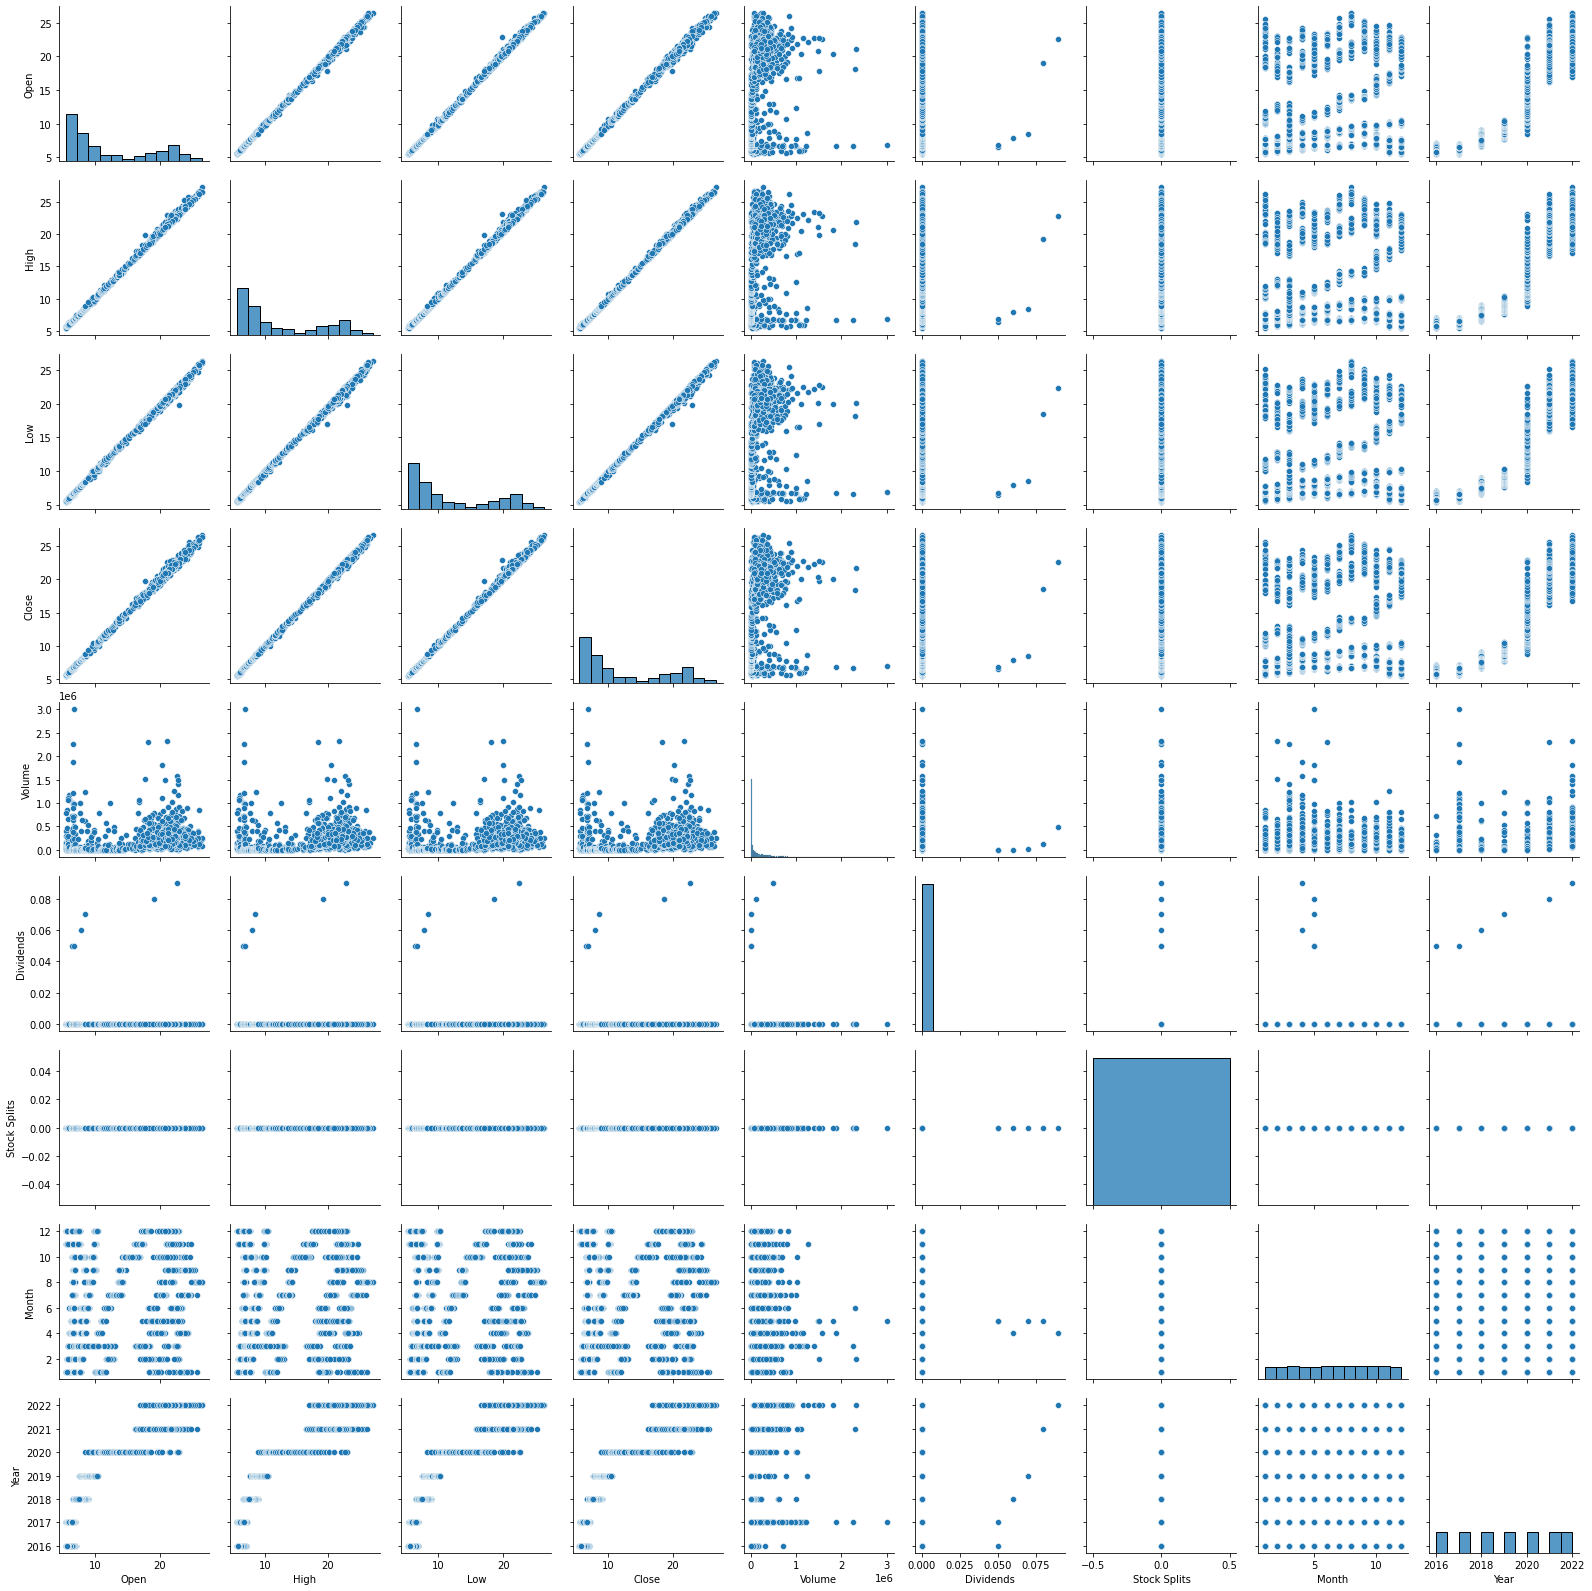

In [24]:
sns.pairplot(EDPR)

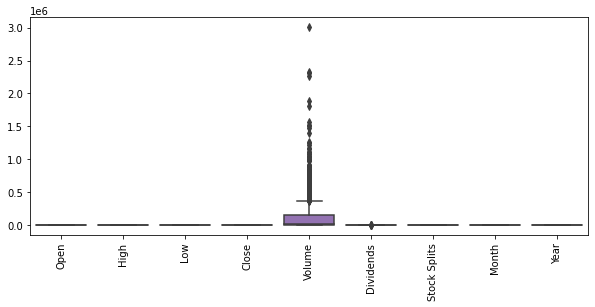

In [25]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=EDPR)

In [26]:
# We selected the main column  for us
close_EDPR= EDPR['Close']

close_EDPR = pd.DataFrame(close_EDPR).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_EDPR.head()

Close
Date                               
2016-01-04 00:00:00+00:00  6.866567
2016-01-05 00:00:00+00:00  7.025837
2016-01-06 00:00:00+00:00  6.943584
2016-01-07 00:00:00+00:00  6.947790
2016-01-08 00:00:00+00:00  6.925656

In [27]:
close_EDPR.tail()

Close
Date                                
2022-12-19 00:00:00+00:00  21.620001
2022-12-20 00:00:00+00:00  21.125000
2022-12-21 00:00:00+00:00  20.920000
2022-12-22 00:00:00+00:00  21.010000
2022-12-23 00:00:00+00:00  20.959999

In [28]:
close_EDPR.describe()

Close
count  1765.000000
mean     12.274155
std       6.328795
min       5.478111
25%       6.866567
50%       9.011983
75%      18.700726
max      26.674999

In [29]:
EDPR_df = close_EDPR

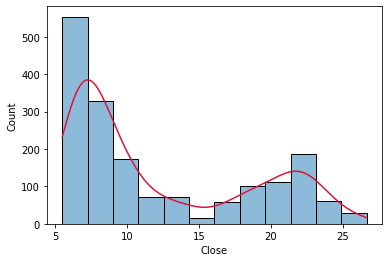

In [30]:
figsize=(3,3)
ax= sns.histplot(EDPR_df['Close'], kde=True);
ax.lines[0].set_color('crimson')

In [31]:
EDPR_df.to_csv("EDPR_df.csv")

In [32]:
EDPR_df= pd.read_csv('EDPR_df.csv')#We decided works with a CSV for modeling 
EDPR_df.tail()

Date      Close
1760  2022-12-19 00:00:00+00:00  21.620001
1761  2022-12-20 00:00:00+00:00  21.125000
1762  2022-12-21 00:00:00+00:00  20.920000
1763  2022-12-22 00:00:00+00:00  21.010000
1764  2022-12-23 00:00:00+00:00  20.959999

In [33]:
EDPR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1765 non-null   object 
 1   Close   1765 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.7+ KB


#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [34]:
VWS.head()

Open        High         Low       Close  \
Date                                                                        
2016-01-04 00:00:00+00:00  462.173593  472.420937  464.095398  464.095398   
2016-01-05 00:00:00+00:00  468.420471  465.394619  454.298747  463.832916   
2016-01-06 00:00:00+00:00  464.906577  464.906577  448.815834  457.195557   
2016-01-07 00:00:00+00:00  446.190319  452.907389  438.033407  449.296509   
2016-01-08 00:00:00+00:00  446.556346  454.229448  438.885925  447.345032   

                           Volume  Dividends  Stock Splits    WeekDay  Month  \
Date                                                                           
2016-01-04 00:00:00+00:00    2528        0.0           0.0     Monday      1   
2016-01-05 00:00:00+00:00    1738        0.0           0.0    Tuesday      1   
2016-01-06 00:00:00+00:00    8847        0.0           0.0  Wednesday      1   
2016-01-07 00:00:00+00:00    1021        0.0           0.0   Thursday      1   
2016-01-08 00:00:00+00:00    6636        0.0           0.0     Friday      1   

                           Year  
Date                             
2016-01-04 00:00:00+00:00  2016  
2016-01-05 00:00:00+00:00  2016  
2016-01-06 00:00:00+00:00  2016  
2016-01-07 00:00:00+00:00  2016  
2016-01-08 00:00:00+00:00  2016

In [35]:
VWS.describe()

Open         High          Low        Close        Volume  \
count  1765.000000  1765.000000  1765.000000  1765.000000  1.765000e+03   
mean    389.890788   394.688319   385.179128   389.841909  2.453853e+05   
std     160.410468   161.526218   159.359353   160.380133  4.113669e+05   
min     112.095294   114.375673   112.035808   114.276527  0.000000e+00   
25%     227.713037   231.406759   223.120844   226.614899  3.479600e+04   
50%     423.992116   429.255641   418.467170   424.028015  8.995600e+04   
75%     534.805744   539.742001   528.840882   534.103577  2.579640e+05   
max     716.406016   722.565060   711.659607   711.659607  4.502410e+06   

         Dividends  Stock Splits        Month         Year  
count  1765.000000   1765.000000  1765.000000  1765.000000  
mean      0.005828      0.002833     6.518414  2018.991501  
std       0.097305      0.119014     3.434737     1.995868  
min       0.000000      0.000000     1.000000  2016.000000  
25%       0.000000      0.000000     3.000000  2017.000000  
50%       0.000000      0.000000     7.000000  2019.000000  
75%       0.000000      0.000000    10.000000  2021.000000  
max       1.942000      5.000000    12.000000  2022.000000

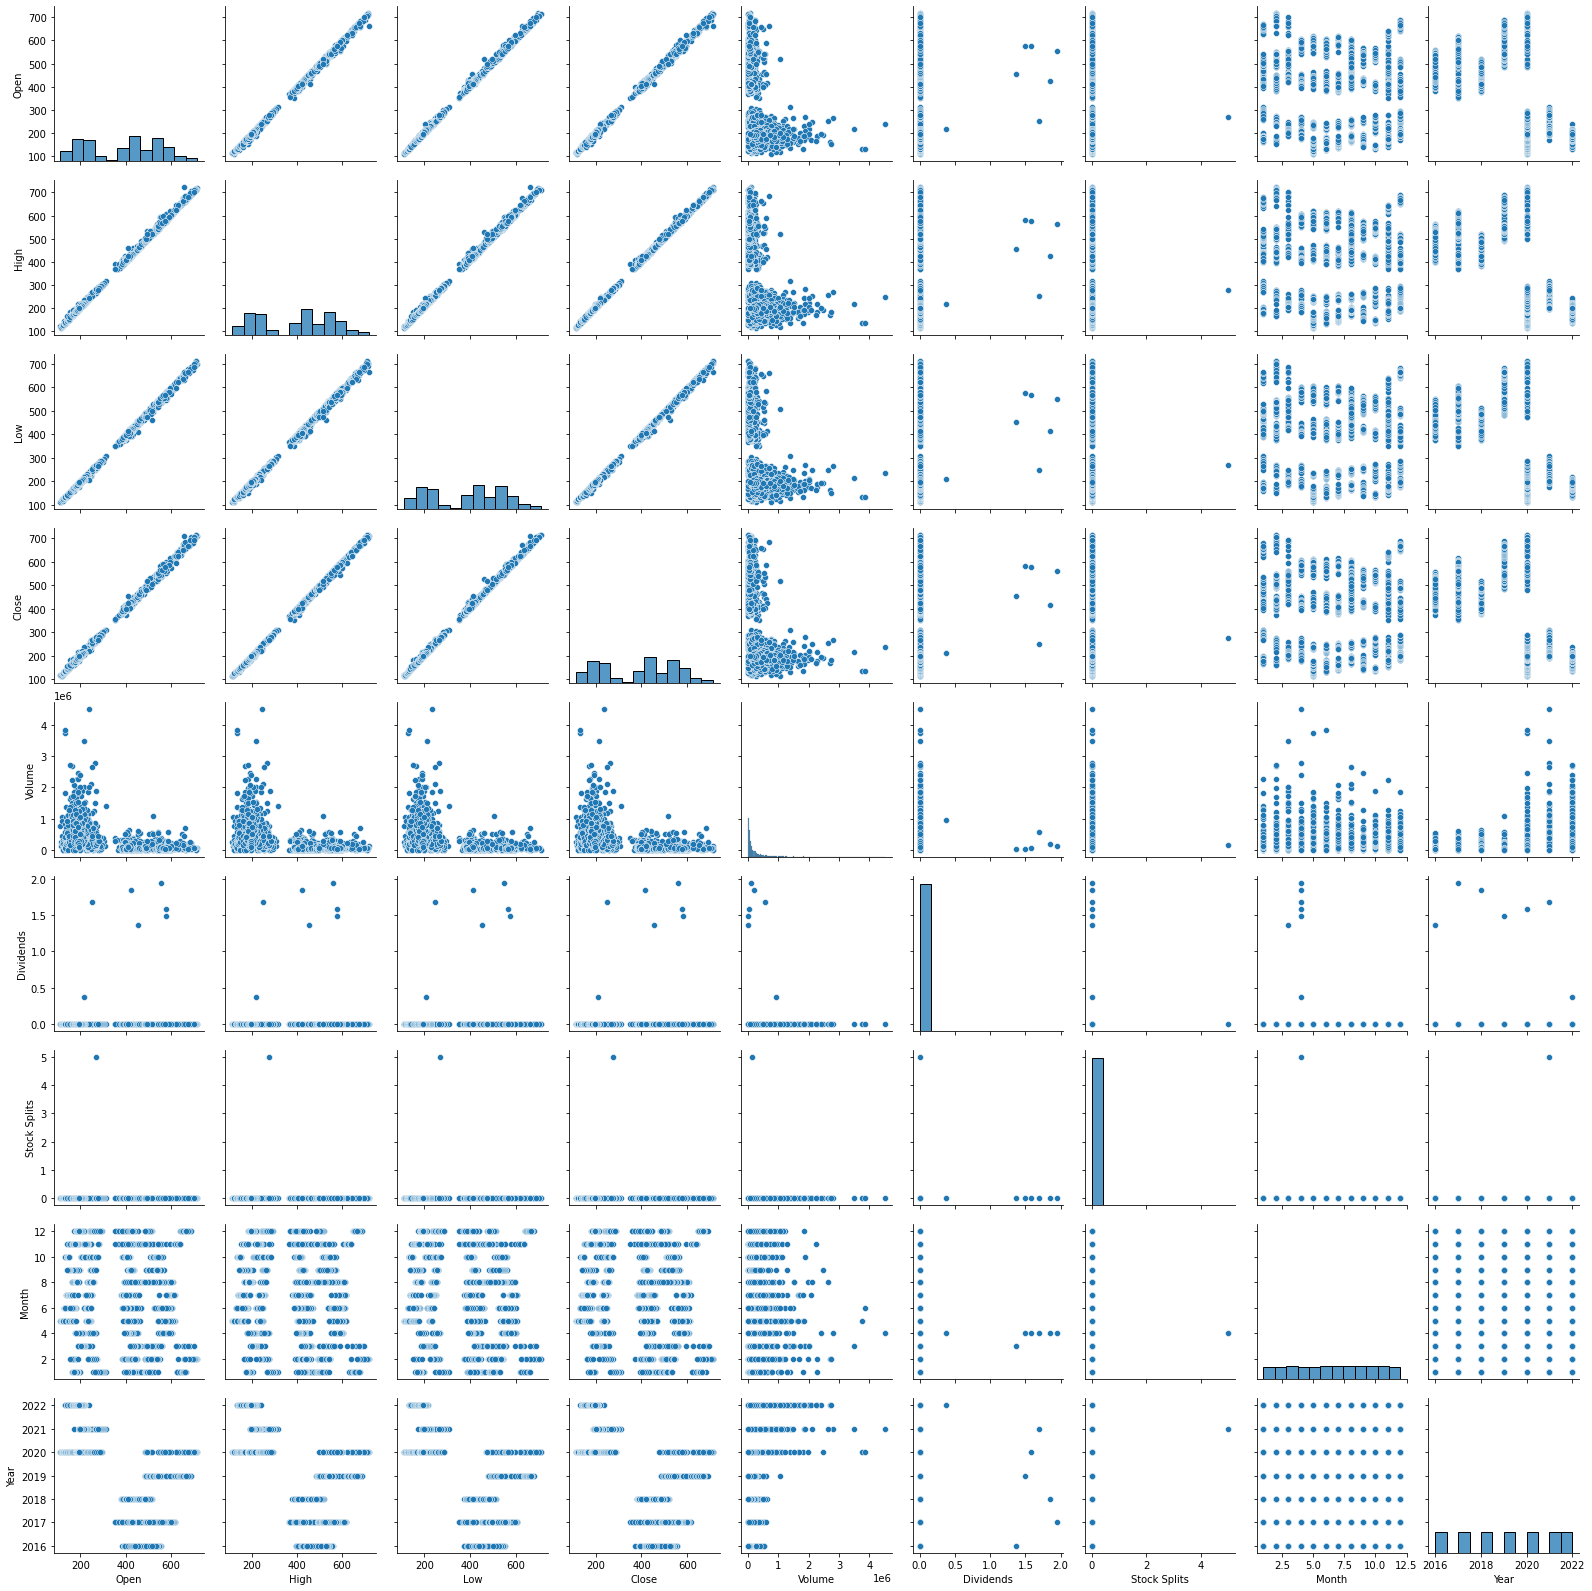

In [36]:
sns.pairplot(VWS)

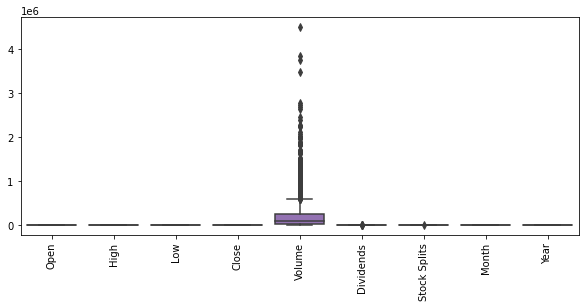

In [37]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=VWS)

In [38]:
# We selected the main column  for us
close_VWS= VWS['Close']

close_VWS= pd.DataFrame(close_VWS).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_VWS.tail()

Close
Date                                 
2022-12-19 00:00:00+00:00  196.119995
2022-12-20 00:00:00+00:00  192.919998
2022-12-21 00:00:00+00:00  194.610001
2022-12-22 00:00:00+00:00  196.085007
2022-12-23 00:00:00+00:00  198.184998

In [39]:
close_VWS.describe()

Close
count  1765.000000
mean    389.841909
std     160.380133
min     114.276527
25%     226.614899
50%     424.028015
75%     534.103577
max     711.659607

In [40]:
VWS_df = close_VWS

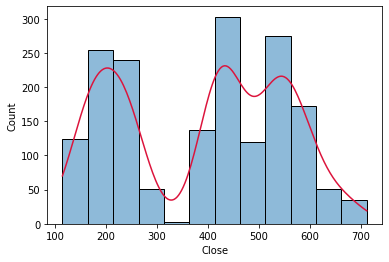

In [41]:
figsize=(3,3)
ax= sns.histplot(VWS_df['Close'], kde=True);
ax.lines[0].set_color('crimson')

In [42]:
VWS_df.to_csv("VWS_df.csv")

In [43]:
VWS_df= pd.read_csv('VWS_df.csv')#We decided works with a CSV for modeling 
VWS_df.head()

Date       Close
0  2016-01-04 00:00:00+00:00  464.095398
1  2016-01-05 00:00:00+00:00  463.832916
2  2016-01-06 00:00:00+00:00  457.195557
3  2016-01-07 00:00:00+00:00  449.296509
4  2016-01-08 00:00:00+00:00  447.345032

In [44]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1765 non-null   object 
 1   Close   1765 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.7+ KB


In [45]:
#convert  the Date data to datatime Type
VWS_df["Date"] = pd.to_datetime(VWS_df.Date, format="%Y/%m/%d")
VWS_df.head()

Date       Close
0  2016-01-04 00:00:00+00:00  464.095398
1  2016-01-05 00:00:00+00:00  463.832916
2  2016-01-06 00:00:00+00:00  457.195557
3  2016-01-07 00:00:00+00:00  449.296509
4  2016-01-08 00:00:00+00:00  447.345032

In [46]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1765 non-null   object 
 1   Close   1765 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.7+ KB


In [47]:
VWS_df = VWS_df.rename(columns={'Close': 'VWS'})
Stocks_df = VWS_df

In [48]:
Stocks_df

Date         VWS
0     2016-01-04 00:00:00+00:00  464.095398
1     2016-01-05 00:00:00+00:00  463.832916
2     2016-01-06 00:00:00+00:00  457.195557
3     2016-01-07 00:00:00+00:00  449.296509
4     2016-01-08 00:00:00+00:00  447.345032
...                         ...         ...
1760  2022-12-19 00:00:00+00:00  196.119995
1761  2022-12-20 00:00:00+00:00  192.919998
1762  2022-12-21 00:00:00+00:00  194.610001
1763  2022-12-22 00:00:00+00:00  196.085007
1764  2022-12-23 00:00:00+00:00  198.184998

[1765 rows x 2 columns]

In [49]:
Stocks_df["EDPR"] = EDPR_df["Close"]

In [50]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1765 non-null   object 
 1   VWS     1765 non-null   float64
 2   EDPR    1765 non-null   float64
dtypes: float64(2), object(1)
memory usage: 41.5+ KB


In [51]:
Stocks_df

Date         VWS       EDPR
0     2016-01-04 00:00:00+00:00  464.095398   6.866567
1     2016-01-05 00:00:00+00:00  463.832916   7.025837
2     2016-01-06 00:00:00+00:00  457.195557   6.943584
3     2016-01-07 00:00:00+00:00  449.296509   6.947790
4     2016-01-08 00:00:00+00:00  447.345032   6.925656
...                         ...         ...        ...
1760  2022-12-19 00:00:00+00:00  196.119995  21.620001
1761  2022-12-20 00:00:00+00:00  192.919998  21.125000
1762  2022-12-21 00:00:00+00:00  194.610001  20.920000
1763  2022-12-22 00:00:00+00:00  196.085007  21.010000
1764  2022-12-23 00:00:00+00:00  198.184998  20.959999

[1765 rows x 3 columns]

In [52]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1765 non-null   object 
 1   VWS     1765 non-null   float64
 2   EDPR    1765 non-null   float64
dtypes: float64(2), object(1)
memory usage: 41.5+ KB


In [53]:
Stocks_df.tail()

Date         VWS       EDPR
1760  2022-12-19 00:00:00+00:00  196.119995  21.620001
1761  2022-12-20 00:00:00+00:00  192.919998  21.125000
1762  2022-12-21 00:00:00+00:00  194.610001  20.920000
1763  2022-12-22 00:00:00+00:00  196.085007  21.010000
1764  2022-12-23 00:00:00+00:00  198.184998  20.959999

In [54]:
import plotly.express as px
graphic = px.line(title = 'Stock price history')
for i in Stocks_df.columns[1:]:
  graphic.add_scatter(x = Stocks_df['Date'], y = Stocks_df[i], name = i)
graphic.show()

In [55]:
#Splinting into X/y
X = Stocks_df.drop('Date', axis=1)
y= Stocks_df['Date']
Stocks_normalized = X
Stocks_normalized.head()

VWS      EDPR
0  464.095398  6.866567
1  463.832916  7.025837
2  457.195557  6.943584
3  449.296509  6.947790
4  447.345032  6.925656

In [56]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(Stocks_normalized)
Stocks = scaler.transform(Stocks_normalized)
DF= pd.DataFrame(Stocks)
DF.rename(columns= {0: 'EDPR', 1: 'VWS'}, inplace=True)
X = DF
X['Date'] = y
X.set_index(X.columns[-1], inplace=True)
X.reset_index(inplace=True)
Stock_norm = X

In [57]:
Stock_norm.head()

Date      EDPR       VWS
0  2016-01-04 00:00:00+00:00  0.585586  0.065503
1  2016-01-05 00:00:00+00:00  0.585146  0.073017
2  2016-01-06 00:00:00+00:00  0.574035  0.069136
3  2016-01-07 00:00:00+00:00  0.560813  0.069335
4  2016-01-08 00:00:00+00:00  0.557546  0.068290

In [58]:
Stock_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1765 non-null   object 
 1   EDPR    1765 non-null   float64
 2   VWS     1765 non-null   float64
dtypes: float64(2), object(1)
memory usage: 41.5+ KB


In [59]:
#Visualizing the graphic with the normalized data

graphic_norm = px.line(title = 'Stock price history')
for i in Stock_norm.columns[1:]:
  graphic_norm.add_scatter(x = Stock_norm['Date'], y = Stock_norm[i], name = i)
graphic_norm.show()

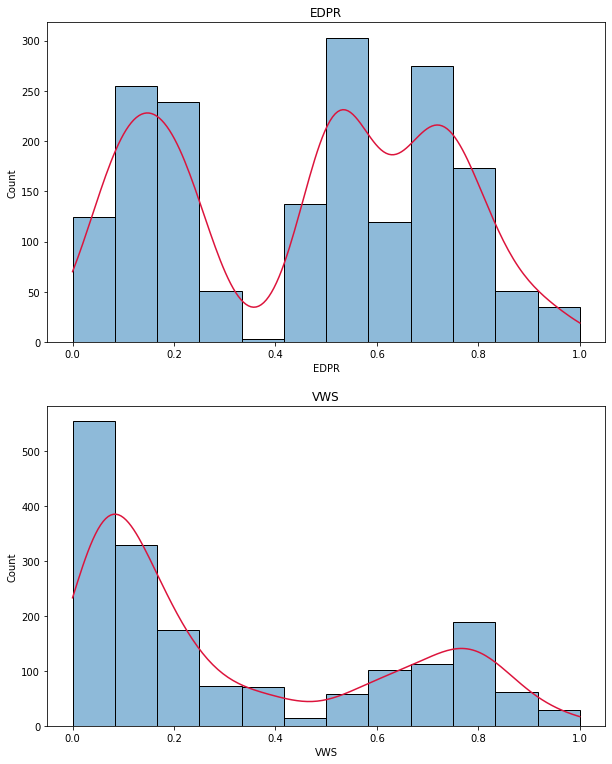

In [60]:
import numpy as np
plt.figure(figsize=(10,20))
i = 1
for i in np.arange(1, len(Stock_norm.columns)):
    plt.subplot(3, 1, i + 1)
    ax=sns.histplot(Stock_norm[Stock_norm.columns[i]], kde = True)
    ax.lines[0].set_color('crimson')
    plt.title(Stock_norm.columns[i])

### II.1- ETS-Decomposition


ETS-Decomposition is a method that allows us to visualize the data after a decomposition of time series into three distinct components: trend, seasonality, and noise.

* Additive decomposition: yt = St + Tt + Rt
* Multiplicative decomposition: yt = St * Tt * Rt

where, 
- S represents the Seasonal variation
- T encodes Trend plus Cycle
- R describes the Residual or the Error component.
Daitan (2019)

In [61]:
# graphs to show seasonal_decompose
def ETS_Decomposition (timeseries):
    decomposition = sm.tsa.seasonal_decompose(timeseries, model='mul',freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

#### A.- EDP Renováveis (0ML1.IL)

In [62]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
EDPR= pd.read_csv('EDPR.csv',index_col='Date',parse_dates=['Date'],date_parser=dateparse, dayfirst=True)
EDPR.head(2)

Open      High       Low     Close  Volume  Dividends  \
Date                                                                    
2016-01-04  6.866567  6.866567  6.866567  6.866567       0        0.0   
2016-01-05  7.025837  7.025837  7.025837  7.025837     150        0.0   

            Stock Splits  WeekDay  Month  Year  
Date                                            
2016-01-04           0.0   Monday      1  2016  
2016-01-05           0.0  Tuesday      1  2016

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [63]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
VWS= pd.read_csv('VWS.csv',index_col='Date', parse_dates=['Date'],date_parser=dateparse, dayfirst=True)
VWS.head(2)

Open        High         Low       Close  Volume  Dividends  \
Date                                                                            
2016-01-04  462.173593  472.420937  464.095398  464.095398    2528        0.0   
2016-01-05  468.420471  465.394619  454.298747  463.832916    1738        0.0   

            Stock Splits  WeekDay  Month  Year  
Date                                            
2016-01-04           0.0   Monday      1  2016  
2016-01-05           0.0  Tuesday      1  2016

### II.2.- Augmented Dickey–Fuller test

The Augmented Dickey-Fuller test helps us to detect if a time series is or not “stationary”. Stationary means that the data has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time. It is ‘stationarize’ the time series as part of the process of fitting a model.Zach (2021) 

In [64]:
def ADFuller(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(key, value, 'not' if value < result[0] else '', 100-int(key[:-1])))
        

#### A.- EDP Renováveis (0ML1.IL)

In [65]:
ADFuller(EDPR['Close'])

ADF Statistic: -0.797767
p-value: 0.819777
Critical Values:
	1%: -3.4329373309060354 - The data is not stationary with 99% confidence
	5%: -2.862683075009153 - The data is not stationary with 95% confidence
	10%: -2.5673785020856443 - The data is not stationary with 90% confidence


#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [66]:
ADFuller(VWS['Close'])

ADF Statistic: -1.693655
p-value: 0.434384
Critical Values:
	1%: -3.432922065988844 - The data is not stationary with 99% confidence
	5%: -2.8626763339238015 - The data is not stationary with 95% confidence
	10%: -2.5673749130580785 - The data is not stationary with 90% confidence


### II.3.- Make the Data Stationary

### II.3.1.- Detrending: 

- Removing the underlying trend in the time series.

#### A.- EDP Renováveis (0ML1.IL)

In [67]:
EDPR['Detrend']=  (EDPR['Close'] - EDPR['Close'].rolling(30).mean())/EDPR['Close'].rolling(30).std().dropna()

ADFuller(EDPR['Detrend'].dropna(inplace=False))

ADF Statistic: -11.468116
p-value: 0.000000
Critical Values:
	1%: -3.4329517425474014 - The data is  stationary with 99% confidence
	5%: -2.862689439250822 - The data is  stationary with 95% confidence
	10%: -2.5673818904827863 - The data is  stationary with 90% confidence


#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [68]:
VWS['Detrend'] =  (VWS['Close'] - VWS['Close'].rolling(30).mean())/VWS['Close'].rolling(30).std().dropna()

ADFuller(VWS['Detrend'].dropna(inplace=False))

ADF Statistic: -10.640638
p-value: 0.000000
Critical Values:
	1%: -3.4329527780962255 - The data is  stationary with 99% confidence
	5%: -2.8626898965523724 - The data is  stationary with 95% confidence
	10%: -2.567382133955709 - The data is  stationary with 90% confidence


### II.3.2.-  Differencing

#### A.- EDP Renováveis (0ML1.IL)

- Removing the underlying seasonal or cyclical patterns in the time series. 

In [69]:
EDPR['Differencing']=  EDPR['Close'] - EDPR['Close'].shift(1).dropna()

In [70]:

ADFuller(EDPR['Differencing'].dropna(inplace=False))

ADF Statistic: -12.092791
p-value: 0.000000
Critical Values:
	1%: -3.4329373309060354 - The data is  stationary with 99% confidence
	5%: -2.862683075009153 - The data is  stationary with 95% confidence
	10%: -2.5673785020856443 - The data is  stationary with 90% confidence


#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [71]:
VWS['Differencing'] =  VWS['Close'] - VWS['Close'].shift(1).dropna()

ADFuller(VWS['Differencing'].dropna(inplace=False))

ADF Statistic: -50.654752
p-value: 0.000000
Critical Values:
	1%: -3.432923078043983 - The data is  stationary with 99% confidence
	5%: -2.8626767808549087 - The data is  stationary with 95% confidence
	10%: -2.56737515100891 - The data is  stationary with 90% confidence


### II.3.3.-  Detrending + Differencing

- Removing the underlying trend and the seasonal or cyclical patterns in the time series.

#### A.- EDP Renováveis (0ML1.IL)

In [72]:
EDPR['Detrend_Diff']=  EDPR['Detrend']- EDPR['Detrend'].shift(1).dropna()

ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))

ADF Statistic: -16.276295
p-value: 0.000000
Critical Values:
	1%: -3.4329684108437117 - The data is  stationary with 99% confidence
	5%: -2.8626968000025603 - The data is  stationary with 95% confidence
	10%: -2.56738580944 - The data is  stationary with 90% confidence


#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [73]:
VWS['Detrend_Diff'] =  VWS['Detrend']- VWS['Detrend'].shift(1)

ADFuller(VWS['Detrend_Diff'].dropna(inplace=False))

ADF Statistic: -18.180169
p-value: 0.000000
Critical Values:
	1%: -3.4329642237790847 - The data is  stationary with 99% confidence
	5%: -2.862694950990622 - The data is  stationary with 95% confidence
	10%: -2.5673848250020415 - The data is  stationary with 90% confidence


### II.4- Identifying AR and MA orders by ACF and PACF plots

Plotting  ACF and PACF help us to undertand how to choose the best MA(q) and AR(p) values:

- ACF= Describes how well the present value of the series is related with its past values 
- PACF= It finds correlation of the residuals

Blue bars on the plots are the error bands, everything in this area is not statistically significant.  In linear regression models performs best when the predictors are not correlated and are independent of each other. 



A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight.

In [74]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
def plot_QQ(timeseries):
    x = sm.qqplot(timeseries, line= 's')

#### A.- EDP Renováveis (0ML1.IL)

In [75]:
# Drop the first row of 'Close' column because It has 'NaN' value
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))

ADF Statistic: -16.276295
p-value: 0.000000
Critical Values:
	1%: -3.4329684108437117 - The data is  stationary with 99% confidence
	5%: -2.8626968000025603 - The data is  stationary with 95% confidence
	10%: -2.56738580944 - The data is  stationary with 90% confidence


It looks like the ACF is lagged by 7 and that PACF is geometric. If both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modelling.

<a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">Masum, M. (2020) </a>


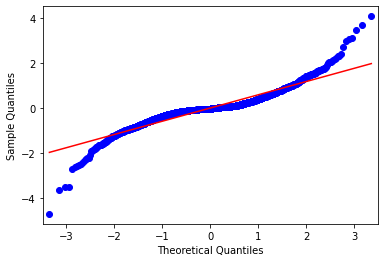

In [76]:
plot_QQ(EDPR['Detrend_Diff'].dropna())

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [77]:
# Drop the first row of 'Close' column because It has 'NaN' value
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))


ADF Statistic: -16.276295
p-value: 0.000000
Critical Values:
	1%: -3.4329684108437117 - The data is  stationary with 99% confidence
	5%: -2.8626968000025603 - The data is  stationary with 95% confidence
	10%: -2.56738580944 - The data is  stationary with 90% confidence


It looks like the ACF is lagged by 3 and that PACF is geometric. If both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modelling. 
<a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">Masum, M. (2020) </a>


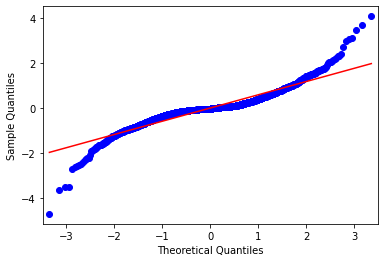

In [78]:
plot_QQ(EDPR['Detrend_Diff'].dropna(inplace=False))

### III.-Modelling

#### A.- EDP Renováveis (0ML1.IL)

In [79]:
from sklearn.model_selection import TimeSeriesSplit

In [80]:
#Specify fold and perform splitting
tscv = TimeSeriesSplit(n_splits=3)
tscv.split(EDPR)

#Find out no of observations in train and test sets
i=0
for train_A, test_A in tscv.split(EDPR):
    i=i+1
    print ("Shape EDPR train%s=%s" % (i, len(train_A)))
    print ("Shape EDPR test%s=%s" % (i, len(test_A)))

Shape EDPR train1=638
Shape EDPR test1=636
Shape EDPR train2=1274
Shape EDPR test2=636
Shape EDPR train3=1910
Shape EDPR test3=636


In [81]:
#Splitting according to the above description
trainA1, testA1 = EDPR.iloc[:500, 0], EDPR.iloc[500:890, 0]
trainA2, testA2 = EDPR.iloc[:890, 0], EDPR.iloc[890:1080, 0]
trainA3, testA3 = EDPR.iloc[:1080, 0], EDPR.iloc[1080:1240, 0]

In [82]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train_A = EDPR[:int(0.85 * (len(EDPR)))]
test_A  = EDPR[int(0.85 * (len(EDPR))):]
train_A.shape, test_A.shape

((2164, 13), (382, 13))

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [83]:
#Specify fold and perform splitting
tscv = TimeSeriesSplit(n_splits=3)
tscv.split(VWS)

#Find out no of observations in train and test sets
i=0
for train_B, test_B in tscv.split(VWS):
    i=i+1
    print ("VWS train%s=%s" % (i, len(train_B)))
    print ("VWS test%s=%s" % (i, len(test_B)))

VWS train1=638
VWS test1=636
VWS train2=1274
VWS test2=636
VWS train3=1910
VWS test3=636


In [84]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train_B = VWS[:int(0.85 * (len(VWS)))]
test_B  = VWS[int(0.85 * (len(VWS))):]

train_B.shape, test_B.shape

((2164, 13), (382, 13))

### III.1.- Moving Averages (MA)

-Process where the present value of series is defined as a linear combination of past errors.


In [85]:
w= 20

#### A.- EDP Renováveis (0ML1.IL)

In [86]:
#create moving average by applying a mean function to a rolling window.
EDPR['MA-RW'] = EDPR['Close'].rolling(window=w).mean()
#EDPR.head()

In [87]:
#create moving average by applying a mean function to a ewm (Exponentially Weighted Moving Average)
EDPR['MA_EWM'] = EDPR['Close'].ewm(span=w,adjust=False).mean()
#EDPR.head()

In [88]:
#create moving average by applying Simple Exponential Smoothing from statmodels Holt-Winters
warnings.filterwarnings('ignore') 
span = w
alpha = 2/(span+1)
EDPR['MA_SES']=SimpleExpSmoothing(EDPR['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues


##### Validating the Forecast

In [89]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1


#First fold RMSE
model1 = SimpleExpSmoothing(EDPR['Close']).fit()
pred1 = model1.predict(start=start , end=end)

In [90]:
# Create a dataframe to store r2 score
MA_SES_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], pred1)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_SES_EDPR['Model'] = 'MA_SES'
MA_SES_EDPR.set_index(['Model'], inplace=True)
MA_SES_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], pred1)
MA_SES_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], pred1)
MA_SES_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], pred1))
MA_SES_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(pred1 - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
MA_SES_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
MA_SES  0.958277              0.27083             0.17229   

        root_mean_squared_error  mean_absolute_percentage_error  
Model                                                            
MA_SES                 0.415078                        1.243024

In [91]:
#create moving average by applying Double Exponential Smoothing from statmodels Holt-Winters
EDPR['MA_Holt-Winters'] = ExponentialSmoothing(EDPR['Close'], trend='add').fit().fittedvalues



##### Validating the Forecast

In [92]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1


#First fold RMSE
model1 = ExponentialSmoothing(EDPR['Close'], seasonal='add',trend='add', seasonal_periods=12).fit()
pred1 = model1.predict(start=start , end=end)

In [93]:
# Create a dataframe to store r2 score
MA_HoltWinters_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], pred1)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_HoltWinters_EDPR['Model'] = 'MA_Holt-Winters'
MA_HoltWinters_EDPR.set_index(['Model'], inplace=True)
MA_HoltWinters_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], pred1)
MA_HoltWinters_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], pred1)
MA_HoltWinters_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], pred1))
MA_HoltWinters_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(pred1 - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
MA_HoltWinters_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_Holt-Winters  0.959024             0.273437            0.169204   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_Holt-Winters                 0.411344                        1.254778

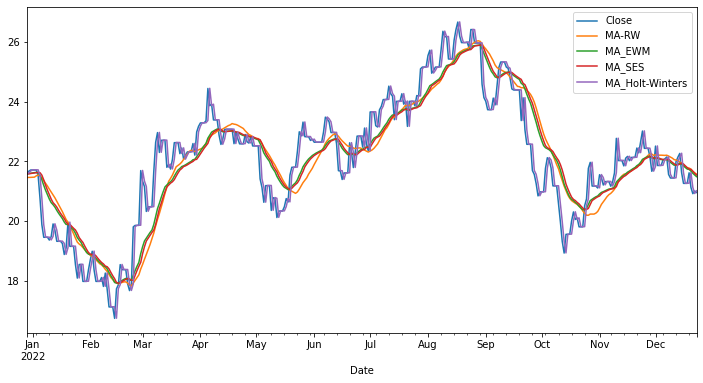

In [94]:
#Plotting the accuracy of the MA
EDPR[['Close','MA-RW','MA_EWM','MA_SES','MA_Holt-Winters']].iloc[-360:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [95]:
#create moving average by applying a mean function to a rolling window.
VWS['MA-RW'] = VWS['Close'].rolling(window=w).mean()
#VWS.head()

In [96]:
#create moving average by applying a mean function to a ewm (Exponentially Weighted Moving Average)
VWS['MA_EWM'] = VWS['Close'].ewm(span=w,adjust=False).mean()
#VWS.head()

In [97]:
warnings.filterwarnings('ignore') 
#create moving average by applying Simple Exponential Smoothing from statmodels Holt-Winters
span = w
alpha = 2/(span+1)
VWS.asfreq(freq='b')
VWS['MA_SES']=SimpleExpSmoothing(VWS['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues

##### Validating the Forecast

In [98]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1

model2 = ExponentialSmoothing(VWS['Close'], seasonal='mul',trend='add', seasonal_periods=12).fit()
pred2 = model2.predict(start=start , end=end)

In [99]:
# Create a dataframe to store r2 score
MA_SES_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], pred2)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_SES_VWS['Model'] = 'MA_SES'
MA_SES_VWS.set_index(['Model'], inplace=True)
MA_SES_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], pred2)
MA_SES_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], pred2)
MA_SES_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], pred2))
MA_SES_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(pred2 - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
MA_SES_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
MA_SES  0.920314             3.957131           31.271809   

        root_mean_squared_error  mean_absolute_percentage_error  
Model                                                            
MA_SES                  5.59212                        2.203026

In [100]:
#create moving average by applying Double Exponential Smoothing from statmodels Holt-Winters
VWS['MA_Holt-Winters'] = ExponentialSmoothing(VWS['Close'], trend='add').fit().fittedvalues

In [101]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1

model2 = ExponentialSmoothing(VWS['Close'], seasonal='mul',trend='add', seasonal_periods=12).fit()
pred2 = model2.predict(start=start , end=end)

In [102]:
# Create a dataframe to store r2 score
MA_HoltWinters_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], pred2)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_HoltWinters_VWS['Model'] = 'MA_Holt-Winters'
MA_HoltWinters_VWS.set_index(['Model'], inplace=True)
MA_HoltWinters_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], pred2)
MA_HoltWinters_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], pred2)
MA_HoltWinters_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], pred2))
MA_HoltWinters_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(pred2 - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
MA_HoltWinters_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_Holt-Winters  0.920314             3.957131           31.271809   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_Holt-Winters                  5.59212                        2.203026

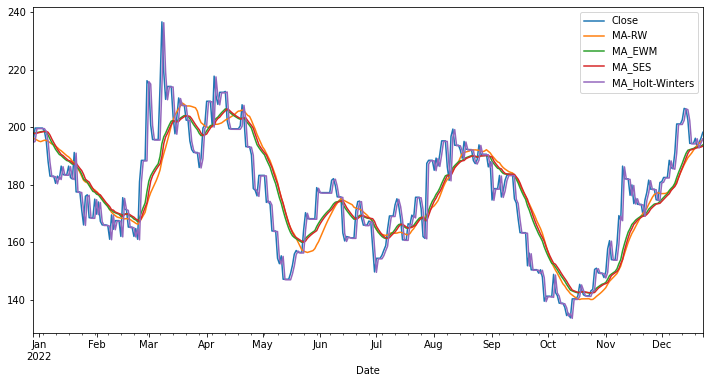

In [103]:
#Plotting the accuracy of the MA
VWS[['Close','MA-RW','MA_EWM','MA_SES','MA_Holt-Winters']].iloc[-360:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### III.2.- ARMA

#### A.- EDP Renováveis (0ML1.IL)

Month: 20 working days

In [104]:
arma_EDPR = smtsa.ARMA(EDPR['Close'].tolist(), order=(1, 0)).fit(maxlag=20, method='mle', trend='nc') 

In [105]:
EDPR['ARMA']= arma_EDPR.predict()
arma_EDPR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2546
Model:                     ARMA(1, 0)   Log Likelihood                 -84.297
Method:                           mle   S.D. of innovations              0.250
Date:                Mon, 26 Dec 2022   AIC                            172.593
Time:                        18:26:01   BIC                            184.278
Sample:                             0   HQIC                           176.831
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9999      0.000   5909.010      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

##### Validating the Forecast

In [106]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1
predictions = arma_EDPR.predict(start = start, end = end, dynamic = False)

# Create a dataframe to store r2 score
R_arma_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arma_EDPR['Model'] = 'ARMA'
R_arma_EDPR.set_index(['Model'], inplace=True)
R_arma_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], predictions)
R_arma_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], predictions)
R_arma_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], predictions))
R_arma_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
R_arma_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARMA   0.958282             0.271694            0.172268   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARMA                  0.415051                        1.246834

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [107]:
VWS=VWS.dropna()

In [108]:
arma_VWS = smtsa.ARMA(VWS['Close'].tolist(), order=(12, 0)).fit(maxlag=20, method='mle', trend='c') 

In [109]:
VWS['ARMA']= arma_VWS.predict()
arma_VWS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2516
Model:                    ARMA(12, 0)   Log Likelihood               -9780.045
Method:                           mle   S.D. of innovations             11.789
Date:                Mon, 26 Dec 2022   AIC                          19588.090
Time:                        18:26:12   BIC                          19669.716
Sample:                             0   HQIC                         19617.714
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        371.1566     75.621      4.908      0.000     222.943     519.370
ar.L1.y        0.9974      0.020     50.052      0.000       0.958       1.036
ar.L2.y       -0.0041      0.028     -0.147      0.883      -0.059       0.051
ar.L3.y        0.0295      0.028      1.048      0.295      -0.026       0.085
ar.L4.y       -0.0229      0.028     -0.816      0.415      -0.078       0.032
ar.L5.y        0.0077      0.028      0.272      0.785      -0.048       0.063
ar.L6.y       -0.0504      0.028     -1.787      0.074      -0.106       0.005
ar.L7.y        0.0364      0.028      1.291      0.197      -0.019       0.092
ar.L8.y       -0.0264      0.028     -0.934      0.350      -0.082       0.029
ar.L9.y        0.0254      0.028      0.901      0.368      -0.030       0.081
ar.L10.y       0.0400      0.028      1.417      0.156      -0.015       0.095
ar.L11.y      -0.0386      0.028     -1.368      0.171      -0.094       0.017
ar.L12.y       0.0033      0.020      0.168      0.867      -0.036       0.043
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.4820           -0.0000j            1.4820           -0.5000
AR.2            -1.1190           -0.7445j            1.3441           -0.4066
AR.3            -1.1190           +0.7445j            1.3441            0.4066
AR.4            -0.4239           -1.2901j            1.3580           -0.3005
AR.5            -0.4239           +1.2901j            1.3580            0.3005
AR.6             0.4051           -1.3062j            1.3676           -0.2021
AR.7             0.4051           +1.3062j            1.3676            0.2021
AR.8             1.0027           -0.0000j            1.0027           -0.0000
AR.9             1.1959           -0.7357j            1.4040           -0.0878
AR.10            1.1959           +0.7357j            1.4040            0.0878
AR.11            1.5873           -0.0000j            1.5873           -0.0000
AR.12           10.3135           -0.0000j           10.3135           -0.0000
------------------------------------------------------------------------------
"""

##### Validating the Forecast

In [110]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1
predictions = arma_VWS.predict(start = start, end = end, dynamic = False)

In [111]:
# Create a dataframe to store r2 score
R_arma_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arma_VWS['Model'] = 'ARMA'
R_arma_VWS.set_index(['Model'], inplace=True)
R_arma_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], predictions)
R_arma_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], predictions)
R_arma_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], predictions))
R_arma_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
R_arma_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARMA  -0.628264            21.090838          638.993751   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARMA                 25.278326                       12.098101

### III.4.-SARIMA

#### A.- EDP Renováveis (0ML1.IL) 

In [112]:
# order = (2, 1, 2) means 
# First 2 for auto regressive model, 1 for difference, and second 2 for moving average
# 12 additional parameter means number of observations per year or the period
SARIMAX_EDPR = SARIMAX(EDPR['Close'], order = (2, 0, 2), seasonal_order = (2, 1, 0, 12)).fit()
#AutoSarima=3, 0, 2 **  2, 1, 0, 12 ***0.88 Score
#by hand=2, 0, 2 **  2, 0, 1, 12 *** 0.91 Score
# Display the summary of the model
print(SARIMAX_EDPR.summary())


                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 2546
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood                -397.917
Date:                             Mon, 26 Dec 2022   AIC                            809.835
Time:                                     18:26:28   BIC                            850.697
Sample:                                 01-04-2016   HQIC                           824.660
                                      - 12-23-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6892      2.942      0.234      0.815      -5.077       6.456
ar.L2          0.2627      

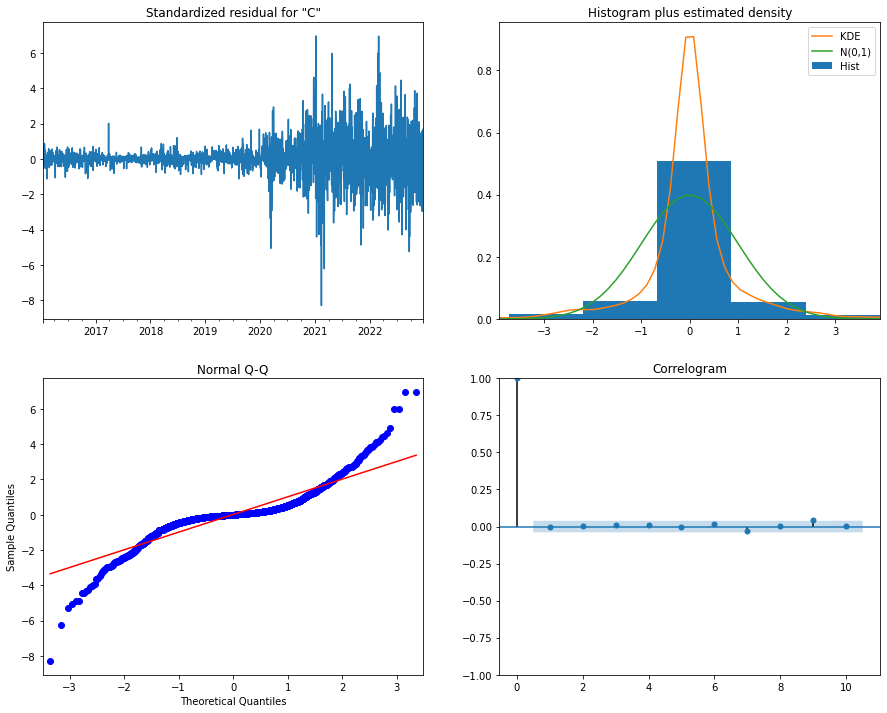

In [113]:
# Diagnosing the model residuals
SARIMAX_EDPR.plot_diagnostics(figsize = (15, 12))
plt.show()

##### Validating the Forecast

In [114]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1
predictions = SARIMAX_EDPR.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

2021-12-07    22.064944
2021-12-08    22.157072
2021-12-09    21.491080
2021-12-10    22.101990
2021-12-11    21.682792
                ...    
2022-12-19    21.141781
2022-12-20    21.389987
2022-12-21    21.188175
2022-12-22    20.879299
2022-12-23    20.847221
Freq: D, Name: SARIMA Predictions, Length: 382, dtype: float64


In [115]:
# Create a dataframe to store r2 score
R_SARIMAX_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_SARIMAX_EDPR['Model'] = 'SARIMAX'
R_SARIMAX_EDPR.set_index(['Model'], inplace=True)
R_SARIMAX_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], predictions)
R_SARIMAX_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], predictions)
R_SARIMAX_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], predictions))
R_SARIMAX_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
R_SARIMAX_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                        
SARIMAX  0.947474              0.35528            0.216899   

         root_mean_squared_error  mean_absolute_percentage_error  
Model                                                             
SARIMAX                 0.465724                        1.625413

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [116]:
# 12 additional parameter means number of observations per year or the period
SARIMAX_VWS = SARIMAX(VWS['Close'], order = (0, 0,3),seasonal_order = (0, 1, 2, 12)).fit()#(AR,D,MA)#(p,d,q)
#AutoSarima=1, 0, 0 **  2, 1, 0, 12 ***	0.052546 Score
#by hand=0, 0, 3 **  0, 1, 2, 12 *** 0.34 Score
# Display the summary of the model
print(SARIMAX_VWS.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                   Close   No. Observations:                 2516
Model:             SARIMAX(0, 0, 3)x(0, 1, [1, 2], 12)   Log Likelihood              -10829.460
Date:                                 Mon, 26 Dec 2022   AIC                          21670.920
Time:                                         18:26:42   BIC                          21705.874
Sample:                                     02-03-2016   HQIC                         21683.609
                                          - 12-23-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.1095      0.005    213.664      0.000       1.099       1

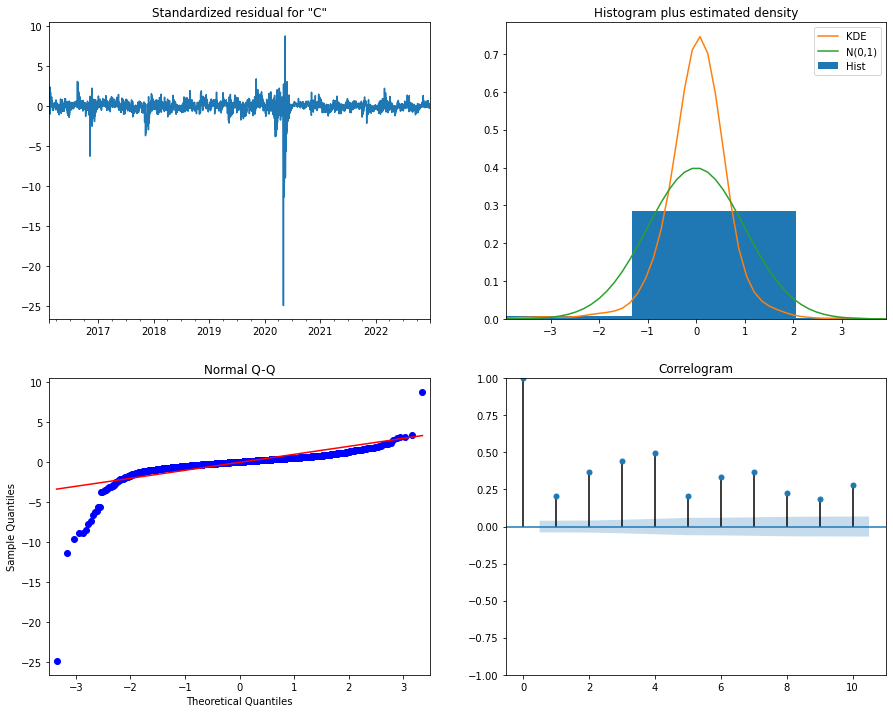

In [117]:
# Diagnosing the model residuals
SARIMAX_VWS.plot_diagnostics(figsize = (15, 12))
plt.show()

##### Validating the Forecast

In [118]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1
predictions = SARIMAX_VWS.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

2022-01-06    194.973821
2022-01-07    187.084356
2022-01-08    186.073285
2022-01-09    187.782373
2022-01-10    187.053069
                 ...    
2023-01-18    197.448854
2023-01-19    195.628358
2023-01-20    192.105468
2023-01-21    188.334059
2023-01-22    189.795239
Freq: D, Name: SARIMA Predictions, Length: 382, dtype: float64


https://stats.stackexchange.com/questions/299712/what-are-the-shortcomings-of-the-mean-absolute-percentage-error-mape

In [119]:
# Create a dataframe to store r2 score
R_SARIMAX_VWS= pd.DataFrame({'r2_score': r2_score(test_B['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_SARIMAX_VWS['Model'] = 'SARIMAX'
R_SARIMAX_VWS.set_index(['Model'], inplace=True)
R_SARIMAX_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], predictions)
R_SARIMAX_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], predictions)
R_SARIMAX_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], predictions))
R_SARIMAX_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100
# Display the results
R_SARIMAX_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                        
SARIMAX -0.257028            18.225973          493.306367   

         root_mean_squared_error  mean_absolute_percentage_error  
Model                                                             
SARIMAX                22.210501                        3.482154

### III.5.- PY TORCH

In [120]:
import torch
from torch import nn, optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import numpy as np

#### A.- EDP Renováveis (0ML1.IL) 

In [121]:
 # We will be using the dataset from the beginning of this notebook with only the columns Date and Close, which are the columns that we need to do this experiment
 base_EDPR = pd.read_csv('EDPR_df.csv')

In [122]:
#Here we can verify that our dataset has only two columns and it has all data from 01/01/2016 to today.
base_EDPR.shape

(1765, 2)

In [123]:
base_EDPR = base_EDPR.dropna()

In [124]:
# In this part of the code, we will split the data into training and test. For this we will use all the data prior to the last 30 days for training and we will use the last 30 days to test it.
EDPR_training_base = base_EDPR.iloc[:-30 , :]
EDPR_test_base = base_EDPR.tail(30)
EDPR_training_base.shape, EDPR_test_base.shape

((1735, 2), (30, 2))

In [125]:
# We can check here that the training dataset uses the first 1582 days(Only weekdays)
EDPR_training_base.tail()

Date      Close
1730  2022-11-07 00:00:00+00:00  21.170000
1731  2022-11-08 00:00:00+00:00  21.320000
1732  2022-11-09 00:00:00+00:00  21.615000
1733  2022-11-10 00:00:00+00:00  22.775000
1734  2022-11-11 00:00:00+00:00  22.030001

In [126]:
# And here we can see that the test dataset starts exactly one day after the last day on the training dataset
EDPR_test_base.head()

Date      Close
1735  2022-11-14 00:00:00+00:00  21.850000
1736  2022-11-15 00:00:00+00:00  22.110001
1737  2022-11-16 00:00:00+00:00  22.170000
1738  2022-11-17 00:00:00+00:00  22.025000
1739  2022-11-18 00:00:00+00:00  22.135000

In [127]:
#We are going to get only the values for the column we wanto to work with.
EDPR_training_base_nn = EDPR_training_base.iloc[:, 1:2].values

In [128]:
EDPR_training_base_nn 

array([[ 6.86656713],
       [ 7.02583742],
       [ 6.94358397],
       ...,
       [21.61499977],
       [22.77499962],
       [22.03000069]])

In [129]:
# Here we will normalize the data since we are working with a neural network, it is best if the values are on the same scale.
normalizer = MinMaxScaler(feature_range=(0,1))
EDPR_training_base_normalized = normalizer.fit_transform(EDPR_training_base_nn)

In [130]:
#This is the training base normalized
EDPR_training_base_normalized

array([[0.06550282],
       [0.07301667],
       [0.06913622],
       ...,
       [0.76128574],
       [0.81601075],
       [0.78086413]])

In [131]:
#The idea to train this model is to use the first 90 values to predict the next price and so on. So to each price we will predict we will use the last 90 values.
X = []
y = []
for i in range(90, len(EDPR_training_base_normalized)):
  X.append(EDPR_training_base_normalized[i-90:i, 0])
  y.append(EDPR_training_base_normalized[i, 0])# This will always be the next value after the 90th value.
X, y = np.array(X), np.array(y)

In [132]:
#First 90 predictive registers to get the next price
X[0]

array([0.06550282, 0.07301667, 0.06913622, 0.06933463, 0.06829043,
       0.06041332, 0.06468103, 0.07126422, 0.06470373, 0.05460193,
       0.05296751, 0.04697455, 0.03880596, 0.03905202, 0.05196869,
       0.05351234, 0.06250174, 0.06531664, 0.06605895, 0.06611117,
       0.0681315 , 0.06145754, 0.06012499, 0.0522865 , 0.05078823,
       0.04111781, 0.03753111, 0.04361485, 0.02767902, 0.02567367,
       0.03243025, 0.03304317, 0.03166754, 0.03421681, 0.03215101,
       0.03219648, 0.03438933, 0.03415553, 0.03212836, 0.03676018,
       0.04211659, 0.04302465, 0.04129712, 0.04135842, 0.04031418,
       0.03487966, 0.03460501, 0.03281389, 0.0328684 , 0.03746756,
       0.03976711, 0.03767411, 0.03175151, 0.03598746, 0.03914737,
       0.04098612, 0.04761925, 0.04688828, 0.04720155, 0.04720155,
       0.04720155, 0.04720155, 0.04720155, 0.04720155, 0.04720155,
       0.04720155, 0.03296598, 0.03296598, 0.03616904, 0.03126574,
       0.03781941, 0.03784893, 0.03776488, 0.03986249, 0.04464

In [133]:
#First price after the 90 before
y[0]

0.0459915997751878

In [134]:
# We need to convert the data to the pytorch format
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [135]:
#We are going to use this to train the model
dataset_EDPR = torch.utils.data.TensorDataset(X, y)
loader_EDPR = torch.utils.data.DataLoader(dataset_EDPR, batch_size=32, shuffle=True)

### Building the Recurrent Neural Network (LSTM)

In [136]:

class regressor_LSTM_EDPR(nn.Module):
  def __init__(self): #constructor method
    super().__init__()

    self.lstm1_EDPR = nn.LSTM(input_size=1, hidden_size=100) #First layer of the network
    self.lstm2_EDPR = nn.LSTM(100, 50)
    self.lstm3_EDPR = nn.LSTM(50, 50, dropout = 0.3, num_layers=2)
    self.dropout_EDPR = nn.Dropout(p = 0.3)
    self.linear_EDPR = nn.Linear(in_features=50, out_features=1)

  def forward(self, X):
    # (batch_size, timesteps = 90 in this case) -> (timesteps, batch_size, dimensions)
    X = X.permute(1, 0).unsqueeze(2)
    X, _ = self.lstm1_EDPR(X)
    X = self.dropout_EDPR(X)
    X, _ = self.lstm2_EDPR(X)
    X = self.dropout_EDPR(X)
    X, _ = self.lstm3_EDPR(X)

    X = X[-1]
    X = self.dropout_EDPR(X)
    X = self.linear_EDPR(X)

    return X

In [137]:
# We do this to access the gpu 
device_pc = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device_pc

device(type='cuda')

In [138]:
#Here we will create the regressor for the LSTM, our accuracy criterion is MSE.
regressor_EDPR = regressor_LSTM_EDPR()
criterion = nn.MSELoss()

optimizer_EDPR = optim.RMSprop(regressor_EDPR.parameters(), lr = 1e-3, alpha = 0.9)

In [139]:
regressor_EDPR.to(device_pc)

regressor_LSTM_EDPR(
  (lstm1_EDPR): LSTM(1, 100)
  (lstm2_EDPR): LSTM(100, 50)
  (lstm3_EDPR): LSTM(50, 50, num_layers=2, dropout=0.3)
  (dropout_EDPR): Dropout(p=0.3, inplace=False)
  (linear_EDPR): Linear(in_features=50, out_features=1, bias=True)
)

## TRAINING THE MODEL

In [140]:
#With this piece of code we will do the training of the model
for epoch in range (100): #100 epochs of training
  running_loss_EDPR = 0.
  running_mae_EDPR = 0.

  for i, data in enumerate(loader_EDPR):
    inputs, labels = data 
    inputs, labels = inputs.to(device_pc), labels.to(device_pc)

    optimizer_EDPR.zero_grad()

    outputs = regressor_EDPR(inputs)
    outputs = outputs.flatten()

    loss = criterion(outputs, labels)
    loss.backward()

    optimizer_EDPR.step()

    running_loss_EDPR += loss.item()

    mae = mean_absolute_error(labels.detach().cpu().numpy().flatten(),
                              outputs.detach().cpu().numpy().flatten())
    running_mae_EDPR +=mae
    #Printing the data regarding this loop
    print('\rEpoch {:3d} - Loop {:3d} of {:3d}: cost {:03.5f} - MAE {:03.5f}'.format(epoch+1, i+1, len(loader_EDPR), loss, mae), end = '\r')

#Printing the data regarding this epoch
running_loss_EDPR /= len(loader_EDPR)
running_mae_EDPR /= len(loader_EDPR)
print('\rEpoch {:3d} Finished: cost {:03.6f} - MAE {:03.6f}'.format(epoch+1, running_loss_EDPR, running_mae_EDPR))

Epoch 100 Finished: cost 0.001679 - MAE 0.029988


## Evaluating the model

In [141]:
EDPR_test_base.head()

Date      Close
1735  2022-11-14 00:00:00+00:00  21.850000
1736  2022-11-15 00:00:00+00:00  22.110001
1737  2022-11-16 00:00:00+00:00  22.170000
1738  2022-11-17 00:00:00+00:00  22.025000
1739  2022-11-18 00:00:00+00:00  22.135000

In [142]:
EDPR_test_base.shape

(30, 2)

In [143]:
real_price = EDPR_test_base.iloc[:, 1:2].values

In [144]:
real_price

array([[21.85000038],
       [22.11000061],
       [22.17000008],
       [22.02499962],
       [22.13500023],
       [22.45000076],
       [22.29000092],
       [22.65500069],
       [23.02000046],
       [22.44000053],
       [22.15999985],
       [21.67000008],
       [21.82999992],
       [22.51499939],
       [21.86499977],
       [22.04999924],
       [22.08499908],
       [22.14999962],
       [21.56500053],
       [21.44499969],
       [21.99500084],
       [22.14500046],
       [22.27000046],
       [21.62000084],
       [21.26499939],
       [21.62000084],
       [21.125     ],
       [20.92000008],
       [21.01000023],
       [20.95999908]])

In [145]:
complete_base_EDPR = pd.concat((EDPR_training_base['Close'], EDPR_test_base['Close']), axis = 0 )

In [146]:
complete_base_EDPR.shape

(1765,)

In [147]:
entries_EDPR = complete_base_EDPR[len(complete_base_EDPR)-len(EDPR_test_base)-90:].values

In [148]:
entries_EDPR

array([23.85000038, 24.07500076, 24.52499962, 24.27499962, 24.18499947,
       23.39999962, 24.01499939, 24.27000046, 23.92000008, 24.02000046,
       23.17499924, 24.01499939, 23.86499977, 24.20999908, 24.19000053,
       25.10499954, 25.16500092, 25.54999924, 25.72999954, 24.95999908,
       25.04999924, 25.16500092, 25.72500038, 26.36499977, 26.18000031,
       26.18499947, 25.43499947, 26.05999947, 26.42000008, 26.67499924,
       26.20000076, 25.98500061, 26.00499916, 25.80999947, 26.42499924,
       26.41500092, 25.96999931, 24.59000015, 24.13999939, 24.01499939,
       23.73500061, 24.125     , 23.89500046, 24.52000046, 25.14999962,
       25.33499908, 25.16500092, 25.12000084, 24.80500031, 24.43000031,
       24.39500046, 23.37000084, 24.13500023, 23.05500031, 22.57500076,
       21.69499969, 21.56500053, 21.26000023, 20.84499931, 20.97999954,
       21.77000046, 22.125     , 22.04500008, 21.78000069, 21.18000031,
       20.57500076, 19.97249985, 19.31500053, 18.92749977, 19.55

In [149]:
entries_EDPR.shape

(120,)

In [150]:
entries_EDPR = entries_EDPR.reshape(-1,1)
entries_EDPR.shape

(120, 1)

In [151]:
entries_EDPR= normalizer.transform(entries_EDPR)
entries_EDPR

array([[0.86672577],
       [0.87734056],
       [0.89857003],
       [0.88677585],
       [0.88252994],
       [0.84549621],
       [0.87450989],
       [0.88654001],
       [0.87002813],
       [0.87474582],
       [0.83488142],
       [0.87450989],
       [0.8674334 ],
       [0.88370934],
       [0.88276587],
       [0.92593254],
       [0.92876321],
       [0.94692617],
       [0.955418  ],
       [0.91909189],
       [0.9233378 ],
       [0.92876321],
       [0.95518215],
       [0.98537524],
       [0.97664757],
       [0.97688341],
       [0.94150086],
       [0.97098632],
       [0.98796997],
       [1.        ],
       [0.97759112],
       [0.96744812],
       [0.96839158],
       [0.95919213],
       [0.98820582],
       [0.98773413],
       [0.9667404 ],
       [0.90163655],
       [0.88040698],
       [0.87450989],
       [0.86130046],
       [0.87969936],
       [0.86884873],
       [0.89833419],
       [0.92805549],
       [0.93678317],
       [0.92876321],
       [0.926

In [152]:
X_test = []
for i in range(90, 120):
  X_test.append(entries_EDPR[i-90:i,0])
X_test = np.array(X_test)  

In [153]:
X_test[29]

array([1.        , 0.97759112, 0.96744812, 0.96839158, 0.95919213,
       0.98820582, 0.98773413, 0.9667404 , 0.90163655, 0.88040698,
       0.87450989, 0.86130046, 0.87969936, 0.86884873, 0.89833419,
       0.92805549, 0.93678317, 0.92876321, 0.92664025, 0.91177955,
       0.89408828, 0.8924371 , 0.84408096, 0.88017114, 0.82922026,
       0.80657545, 0.76505987, 0.75892694, 0.74453802, 0.72495963,
       0.7313285 , 0.76859816, 0.78534588, 0.78157175, 0.76906994,
       0.74076388, 0.71222198, 0.68379795, 0.65277928, 0.63449826,
       0.66421965, 0.68521329, 0.69960221, 0.68769005, 0.69004886,
       0.67601384, 0.70939131, 0.72024203, 0.76859816, 0.77803346,
       0.74052795, 0.73746153, 0.75845516, 0.75373747, 0.74217913,
       0.74760453, 0.7402921 , 0.7473686 , 0.76128574, 0.81601075,
       0.78086413, 0.7723723 , 0.78463826, 0.78746884, 0.78062819,
       0.78581766, 0.80067836, 0.79313009, 0.81034959, 0.82756909,
       0.80020658, 0.78699706, 0.76388047, 0.77142874, 0.80374

## FORECAST

In [154]:
#We do this to convert from the numpy array format to the torch format in order to do the forecasts
X_test = torch.tensor(X_test, device = device_pc, dtype = torch.float32)

In [155]:
regressor_EDPR.eval()
forecast_EDPR = regressor_EDPR.forward(X_test)

In [156]:
forecast_EDPR

tensor([[0.7437],
        [0.7215],
        [0.7198],
        [0.7352],
        [0.7382],
        [0.7325],
        [0.7381],
        [0.7430],
        [0.7504],
        [0.7628],
        [0.7545],
        [0.7353],
        [0.7181],
        [0.7193],
        [0.7431],
        [0.7391],
        [0.7254],
        [0.7246],
        [0.7340],
        [0.7233],
        [0.7062],
        [0.7158],
        [0.7356],
        [0.7423],
        [0.7207],
        [0.6976],
        [0.7040],
        [0.7071],
        [0.6938],
        [0.6856]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [157]:
forecast_EDPR.shape

torch.Size([30, 1])

In [158]:
#Convert from pytorch format to numpy array
forecast_EDPR = forecast_EDPR.detach().cpu().numpy().reshape(-1,1)

In [159]:
forecast_EDPR.shape

(30, 1)

In [160]:
#To get the real values 
forecast_EDPR = normalizer.inverse_transform(forecast_EDPR)

In [161]:
forecast_EDPR.mean()

20.888763

In [162]:
real_price.mean()

21.91366678873698

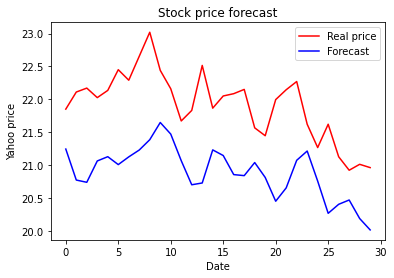

In [163]:
plt.plot(real_price, color= 'red', label= 'Real price')
plt.plot(forecast_EDPR, color = 'blue', label = 'Forecast')
plt.title('Stock price forecast')
plt.xlabel('Date')
plt.ylabel('Yahoo price')
plt.legend()


In [164]:
# Create a dataframe to store r2 score
NEURAL_NET= pd.DataFrame({'r2_score': r2_score(real_price, forecast_EDPR)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
NEURAL_NET['Model'] = 'NEURAL_NET'
NEURAL_NET.set_index(['Model'], inplace=True)
NEURAL_NET['mean_absolute_error'] = mean_absolute_error(real_price, forecast_EDPR)
NEURAL_NET['mean_squared_error'] = mean_squared_error(real_price, forecast_EDPR)
NEURAL_NET['root_mean_squared_error'] = np.sqrt(mean_squared_error(real_price, forecast_EDPR))
NEURAL_NET['mean_absolute_percentage_error'] = np.mean(np.abs(forecast_EDPR - real_price)
                                                               /np.abs(real_price))*100
# Display the results
NEURAL_NET

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                           
NEURAL_NET -3.681678             1.024905            1.201849   

            root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                
NEURAL_NET                 1.096289                        4.652181

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [165]:
 # We will be using the dataset from the beginning of this notebook with only the columns Date and Close, which are the columns that we need to do this experiment
 base_VWS = pd.read_csv('VWS_df.csv')

In [166]:
#Here we can verify that our dataset has only two columns and it has all data from 01/01/2016 to today.
base_VWS.shape

(1765, 2)

In [167]:
base_VWS = base_VWS.dropna()

In [168]:
# In this part of the code, we will split the data into training and test. For this we will use all the data prior to the last 30 days for training and we will use the last 30 days to test it.
VWS_training_base = base_VWS.iloc[:-30 , :]
VWS_test_base = base_VWS.tail(30)
VWS_training_base.shape, VWS_test_base.shape

((1735, 2), (30, 2))

In [169]:
# We can check here that the training dataset uses the first 1582 days(Only weekdays)
VWS_training_base.tail()

Date       Close
1730  2022-11-07 00:00:00+00:00  159.449997
1731  2022-11-08 00:00:00+00:00  169.210007
1732  2022-11-09 00:00:00+00:00  167.619995
1733  2022-11-10 00:00:00+00:00  186.429993
1734  2022-11-11 00:00:00+00:00  182.000000

In [170]:
# And here we can see that the test dataset starts exactly one day after the last day on the training dataset
VWS_test_base.head()

Date       Close
1735  2022-11-14 00:00:00+00:00  176.270004
1736  2022-11-15 00:00:00+00:00  179.889999
1737  2022-11-16 00:00:00+00:00  173.380005
1738  2022-11-17 00:00:00+00:00  175.250000
1739  2022-11-18 00:00:00+00:00  173.139999

In [171]:
#We are going to get only the values for the column we wanto to work with.
VWS_training_base_nn = VWS_training_base.iloc[:, 1:2].values

In [172]:
VWS_training_base_nn 

array([[464.09539795],
       [463.83291626],
       [457.19555664],
       ...,
       [167.61999512],
       [186.42999268],
       [182.        ]])

In [173]:
# Here we will normalize the data since we are working with a neural network, it is best if the values are on the same scale.
normalizer = MinMaxScaler(feature_range=(0,1))
VWS_training_base_normalized = normalizer.fit_transform(VWS_training_base_nn)

In [174]:
#This is the training base normalized
VWS_training_base_normalized

array([[0.5855855 ],
       [0.58514612],
       [0.57403539],
       ...,
       [0.08929524],
       [0.12078257],
       [0.11336691]])

In [175]:
#The idea to train this model is to use the first 90 values to predict the next price and so on. So to each price we will predict we will use the last 90 values.
X = []
y = []
for i in range(95, len(VWS_training_base_normalized)):
  X.append(VWS_training_base_normalized[i-95:i, 0])
  y.append(VWS_training_base_normalized[i, 0])# This will always be the next value after the 90th value.
X, y = np.array(X), np.array(y)

In [176]:
#First 90 predictive registers to get the next price
X[0]

array([0.5855855 , 0.58514612, 0.57403539, 0.56081264, 0.55754593,
       0.53067999, 0.53757403, 0.56135992, 0.53089981, 0.51184913,
       0.47721137, 0.52959269, 0.50277181, 0.49510174, 0.51181649,
       0.5153775 , 0.51324688, 0.52493595, 0.51918465, 0.5390694 ,
       0.53612831, 0.51505071, 0.50639091, 0.50312308, 0.50083552,
       0.4340081 , 0.46676056, 0.51349046, 0.49495349, 0.49439733,
       0.51103917, 0.52587944, 0.53049134, 0.53776233, 0.52991938,
       0.54495158, 0.55851313, 0.53955961, 0.5569609 , 0.56520578,
       0.55557214, 0.57934766, 0.58248697, 0.57214712, 0.56892644,
       0.55630726, 0.54755929, 0.54699398, 0.53931446, 0.54474468,
       0.55238589, 0.55045726, 0.55237118, 0.55818634, 0.5655785 ,
       0.56807162, 0.564882  , 0.56918488, 0.56929711, 0.5575328 ,
       0.57836294, 0.56919995, 0.56575551, 0.56331245, 0.55397209,
       0.55913392, 0.54774519, 0.56052671, 0.55577459, 0.54634519,
       0.54856444, 0.55677204, 0.54545099, 0.54168201, 0.54857

In [177]:
#First price after the 90 before
y[0]

0.5271214841802119

In [178]:
# We need to convert the data to the pytorch format
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [179]:
#We are going to use this to train the model
dataset_VWS = torch.utils.data.TensorDataset(X, y)
loader_VWS = torch.utils.data.DataLoader(dataset_VWS, batch_size=32, shuffle=True)

### Building the Recurrent Neural Network (LSTM)

In [180]:
class regressor_LSTM_VWS(nn.Module):
  def __init__(self): #constructor method
    super().__init__()

    self.lstm1_VWS = nn.LSTM(input_size=1, hidden_size=100) #First layer of the network
    self.lstm2_VWS = nn.LSTM(100, 50)
    self.lstm3_VWS = nn.LSTM(50, 50, dropout = 0.3, num_layers=2)
    self.dropout_VWS = nn.Dropout(p = 0.3)
    self.linear_VWS = nn.Linear(in_features=50, out_features=1)

  def forward(self, X):
    # (batch_size, timesteps = 90 in this case) -> (timesteps, batch_size, dimensions)
    X = X.permute(1, 0).unsqueeze(2)
    X, _ = self.lstm1_VWS(X)
    X = self.dropout_VWS(X)
    X, _ = self.lstm2_VWS(X)
    X = self.dropout_VWS(X)
    X, _ = self.lstm3_VWS(X)

    X = X[-1]
    X = self.dropout_VWS(X)
    X = self.linear_VWS(X)

    return X

In [181]:
# We do this to access the gpu 
device_pc_VWS = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device_pc_VWS

device(type='cuda')

In [182]:
#Here we will create the regressor for the LSTM, our accuracy criterion is MSE.
regressor_VWS = regressor_LSTM_VWS()
criterion_VWS = nn.MSELoss()
optimizer_VWS = optim.RMSprop(regressor_VWS.parameters())

In [183]:
regressor_VWS.to(device_pc_VWS)

regressor_LSTM_VWS(
  (lstm1_VWS): LSTM(1, 100)
  (lstm2_VWS): LSTM(100, 50)
  (lstm3_VWS): LSTM(50, 50, num_layers=2, dropout=0.3)
  (dropout_VWS): Dropout(p=0.3, inplace=False)
  (linear_VWS): Linear(in_features=50, out_features=1, bias=True)
)

In [184]:
#With this piece of code we will do the training of the model
for epoch in range (100): #100 epochs of training
  running_loss_VWS = 0.
  running_mae_VWS = 0.

  for i, data in enumerate(loader_VWS):
    inputs, labels = data 
    inputs, labels = inputs.to(device_pc_VWS), labels.to(device_pc_VWS)

    optimizer_VWS.zero_grad()

    outputs = regressor_VWS(inputs)
    outputs = outputs.flatten()

    loss = criterion_VWS(outputs, labels)
    loss.backward()

    optimizer_VWS.step()

    running_loss_VWS += loss.item()

    mae = mean_absolute_error(labels.detach().cpu().numpy().flatten(),
                              outputs.detach().cpu().numpy().flatten())
    running_mae_VWS +=mae
    #Printing the data regarding this loop
    print('\rEpoch {:3d} - Loop {:3d} of {:3d}: cost {:03.5f} - MAE {:03.5f}'.format(epoch+1, i+1, len(loader_VWS), loss, mae), end = '\r')

#Printing the data regarding this epoch
running_loss_VWS /= len(loader_VWS)
running_mae_VWS /= len(loader_VWS)
print('\rEpoch {:3d} Finished: cost {:03.6f} - MAE {:03.6f}'.format(epoch+1, running_loss_VWS, running_mae_VWS))

Epoch 100 Finished: cost 0.075224 - MAE 0.242478


## Evaluating the model

In [185]:
VWS_test_base.head()

Date       Close
1735  2022-11-14 00:00:00+00:00  176.270004
1736  2022-11-15 00:00:00+00:00  179.889999
1737  2022-11-16 00:00:00+00:00  173.380005
1738  2022-11-17 00:00:00+00:00  175.250000
1739  2022-11-18 00:00:00+00:00  173.139999

In [186]:
VWS_test_base.shape

(30, 2)

In [187]:
real_price_VWS = VWS_test_base.iloc[:, 1:2].values

In [188]:
real_price_VWS

array([[176.27000427],
       [179.88999939],
       [173.38000488],
       [175.25      ],
       [173.13999939],
       [169.13000488],
       [174.67999268],
       [177.33000183],
       [181.55999756],
       [178.41000366],
       [174.71000671],
       [174.63000488],
       [180.74000549],
       [181.02000427],
       [182.47999573],
       [188.44999695],
       [185.88999939],
       [185.50999451],
       [191.11000061],
       [201.08500671],
       [202.5249939 ],
       [206.5       ],
       [206.25      ],
       [202.3999939 ],
       [194.33000183],
       [196.11999512],
       [192.91999817],
       [194.61000061],
       [196.08500671],
       [198.18499756]])

In [189]:
complete_base_VWS = pd.concat((VWS_training_base['Close'], VWS_test_base['Close']), axis = 0 )

In [190]:
complete_base_VWS.shape

(1765,)

In [191]:
entries_VWS = complete_base_VWS[len(complete_base_VWS)-len(VWS_test_base)-90:].values

In [192]:
entries_VWS

array([164.57000732, 169.08999634, 172.94999695, 175.07000732,
       172.5       , 167.91999817, 160.77999878, 166.38999939,
       166.03999329, 169.36999512, 168.58999634, 175.6000061 ,
       171.55999756, 161.91999817, 161.32000732, 187.38999939,
       188.44999695, 184.99000549, 189.22000122, 186.47999573,
       190.57000732, 195.21000671, 186.17999268, 181.44999695,
       196.75500488, 199.31500244, 193.67999268, 191.99000549,
       189.17999268, 195.02999878, 192.3500061 , 192.16999817,
       188.33000183, 187.28999329, 188.66000366, 193.83000183,
       190.55000305, 186.16999817, 187.99000549, 174.61999512,
       178.6000061 , 183.17999268, 175.67999268, 177.8999939 ,
       181.57000732, 183.32000732, 183.28999329, 175.05000305,
       173.6000061 , 168.05999756, 163.27999878, 151.75999451,
       156.1499939 , 150.33000183, 150.41000366, 149.19000244,
       150.38000488, 147.77000427, 139.44000244, 141.17999268,
       140.96000671, 148.77000427, 142.47000122, 141.38

In [193]:
entries_VWS.shape

(120,)

In [194]:
entries_VWS = entries_VWS.reshape(-1,1)
entries_VWS.shape

(120, 1)

In [195]:
entries_VWS= normalizer.transform(entries_VWS)
entries_VWS

array([[0.08418966],
       [0.09175598],
       [0.09821749],
       [0.10176632],
       [0.09746421],
       [0.08979744],
       [0.07784531],
       [0.08723627],
       [0.08665037],
       [0.09222469],
       [0.09091899],
       [0.10265352],
       [0.09589068],
       [0.07975363],
       [0.07874927],
       [0.12238959],
       [0.12416399],
       [0.11837208],
       [0.12545296],
       [0.12086628],
       [0.12771282],
       [0.13548003],
       [0.12036408],
       [0.11244622],
       [0.13806631],
       [0.14235166],
       [0.13291884],
       [0.13008985],
       [0.12538598],
       [0.13517871],
       [0.13069248],
       [0.13039116],
       [0.12396313],
       [0.12222219],
       [0.12451554],
       [0.13316995],
       [0.12767934],
       [0.12034735],
       [0.12339398],
       [0.10101302],
       [0.10767543],
       [0.11534218],
       [0.10278742],
       [0.10650363],
       [0.11264711],
       [0.11557656],
       [0.11552632],
       [0.101

In [196]:
X_test = []
for i in range(95, 120):
  X_test.append(entries_VWS[i-95:i,0])
X_test = np.array(X_test) 

In [197]:
X_test[1]

array([0.09175598, 0.09821749, 0.10176632, 0.09746421, 0.08979744,
       0.07784531, 0.08723627, 0.08665037, 0.09222469, 0.09091899,
       0.10265352, 0.09589068, 0.07975363, 0.07874927, 0.12238959,
       0.12416399, 0.11837208, 0.12545296, 0.12086628, 0.12771282,
       0.13548003, 0.12036408, 0.11244622, 0.13806631, 0.14235166,
       0.13291884, 0.13008985, 0.12538598, 0.13517871, 0.13069248,
       0.13039116, 0.12396313, 0.12222219, 0.12451554, 0.13316995,
       0.12767934, 0.12034735, 0.12339398, 0.10101302, 0.10767543,
       0.11534218, 0.10278742, 0.10650363, 0.11264711, 0.11557656,
       0.11552632, 0.10173284, 0.09930559, 0.09003179, 0.08203023,
       0.06274611, 0.07009483, 0.06035235, 0.06048627, 0.05844403,
       0.06043606, 0.056067  , 0.04212285, 0.04503553, 0.04466728,
       0.05774097, 0.04719497, 0.04538708, 0.0409678 , 0.03859077,
       0.03378649, 0.0351424 , 0.03243056, 0.04349549, 0.04518621,
       0.05194903, 0.04881872, 0.04587252, 0.04523643, 0.04811

## FORECAST

In [198]:
#We do this to convert from the numpy array format to the torch format in order to do the forecasts
X_test_VWS = torch.tensor(X_test, device = device_pc_VWS, dtype = torch.float32)

In [199]:
regressor_VWS.eval()
forecast_VWS = regressor_VWS.forward(X_test_VWS)

In [200]:
forecast_VWS

tensor([[0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624],
        [0.4624]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [201]:
forecast_VWS.shape

torch.Size([25, 1])

In [202]:
#Convert from pytorch format to numpy array
forecast_VWS = forecast_VWS.detach().cpu().numpy().reshape(-1,1)

In [203]:
forecast_VWS.shape

(25, 1)

In [204]:
#To get the real values 
forecast_VWS = normalizer.inverse_transform(forecast_VWS)

In [205]:
forecast_VWS.mean()

390.50864

In [206]:
real_price_VWS.mean()

186.48633371988933

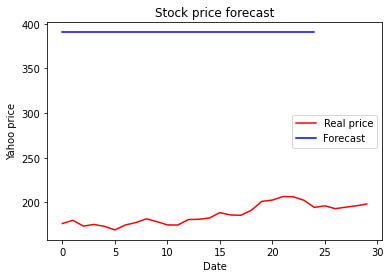

In [207]:
plt.plot(real_price_VWS, color= 'red', label= 'Real price')
plt.plot(forecast_VWS, color = 'blue', label = 'Forecast')
plt.title('Stock price forecast')
plt.xlabel('Date')
plt.ylabel('Yahoo price')
plt.legend()

### III.6.-Facebook Prophet

#### A.- EDP Renováveis (0ML1.IL) 

In [208]:
dataset_EDPR = pd.read_csv('EDPR.csv')
dataset_EDPR.head()

Date      Open      High       Low     Close  Volume  Dividends  \
0  2016-01-04  6.866567  6.866567  6.866567  6.866567       0        0.0   
1  2016-01-05  7.025837  7.025837  7.025837  7.025837     150        0.0   
2  2016-01-06  6.953853  6.943584  6.867913  6.943584    1331        0.0   
3  2016-01-07  6.905927  6.962225  6.856846  6.947790   11142        0.0   
4  2016-01-08  6.969107  7.005051  6.925656  6.925656   13085        0.0   

   Stock Splits    WeekDay  Month  Year  
0           0.0     Monday      1  2016  
1           0.0    Tuesday      1  2016  
2           0.0  Wednesday      1  2016  
3           0.0   Thursday      1  2016  
4           0.0     Friday      1  2016

In [209]:
dataset_EDPR = dataset_EDPR[['Date', 'Close']].rename(columns = {'Date': 'ds', 'Close': 'y'})
dataset_EDPR.head()

ds         y
0  2016-01-04  6.866567
1  2016-01-05  7.025837
2  2016-01-06  6.943584
3  2016-01-07  6.947790
4  2016-01-08  6.925656

In [210]:
dataset_EDPR.tail()

ds          y
2541  2022-12-19  21.620001
2542  2022-12-20  21.125000
2543  2022-12-21  20.920000
2544  2022-12-22  21.010000
2545  2022-12-23  20.959999

In [211]:
dataset_EDPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2546 non-null   object 
 1   y       2546 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.9+ KB


In [212]:
dataset_EDPR.shape

(2546, 2)

In [213]:
#Split into train / test 

train_EDPR = dataset_EDPR.iloc[:-60 , :]
test_EDPR = dataset_EDPR.tail(60)


In [214]:
train_EDPR.tail()

ds          y
2481  2022-10-20  20.105000
2482  2022-10-21  19.807501
2483  2022-10-22  19.807501
2484  2022-10-23  19.807501
2485  2022-10-24  20.514999

In [215]:
test_EDPR.head()

ds          y
2486  2022-10-25  20.745001
2487  2022-10-26  21.770000
2488  2022-10-27  21.969999
2489  2022-10-28  21.174999
2490  2022-10-29  21.174999

In [216]:
test_EDPR.tail(3)

ds          y
2543  2022-12-21  20.920000
2544  2022-12-22  21.010000
2545  2022-12-23  20.959999

In [217]:
test_EDPR.shape, train_EDPR.shape

((60, 2), (2486, 2))

In [218]:
model = Prophet()
model.fit(train_EDPR)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7loqcdj/7gkwc7he.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7loqcdj/p73ltt7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34653', 'data', 'file=/tmp/tmpm7loqcdj/7gkwc7he.json', 'init=/tmp/tmpm7loqcdj/p73ltt7z.json', 'output', 'file=/tmp/tmpm7loqcdj/prophet_model7vtab3j0/prophet_model-20221226182755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:27:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:27:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [219]:
future_EDPR = model.make_future_dataframe(periods=60, freq='d', include_history = True ) # With this line of code the model will make predictions for the next 60 days

In [220]:
preds_train_EDPR = model.predict(future_EDPR)

In [221]:
preds_train_EDPR.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2541 2022-12-19  23.915591   22.407932   25.102533    23.810331    24.052549   
2542 2022-12-20  23.922952   22.480458   24.917197    23.813946    24.065804   
2543 2022-12-21  23.930314   22.558424   25.148515    23.812540    24.076350   
2544 2022-12-22  23.937675   22.589493   25.060805    23.816681    24.090298   
2545 2022-12-23  23.945036   22.537302   25.165072    23.819855    24.105190   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2541       -0.203088             -0.203088             -0.203088 -0.000897   
2542       -0.169897             -0.169897             -0.169897  0.008789   
2543       -0.144952             -0.144952             -0.144952  0.009769   
2544       -0.122369             -0.122369             -0.122369  0.008178   
2545       -0.108273             -0.108273             -0.108273 -0.001848   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
2541     -0.000897     -0.000897 -0.202191     -0.202191     -0.202191   
2542      0.008789      0.008789 -0.178685     -0.178685     -0.178685   
2543      0.009769      0.009769 -0.154721     -0.154721     -0.154721   
2544      0.008178      0.008178 -0.130547     -0.130547     -0.130547   
2545     -0.001848     -0.001848 -0.106425     -0.106425     -0.106425   

      multiplicative_terms  multiplicative_terms_lower  \
2541                   0.0                         0.0   
2542                   0.0                         0.0   
2543                   0.0                         0.0   
2544                   0.0                         0.0   
2545                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2541                         0.0  23.712503  
2542                         0.0  23.753056  
2543                         0.0  23.785362  
2544                         0.0  23.815306  
2545                         0.0  23.836763

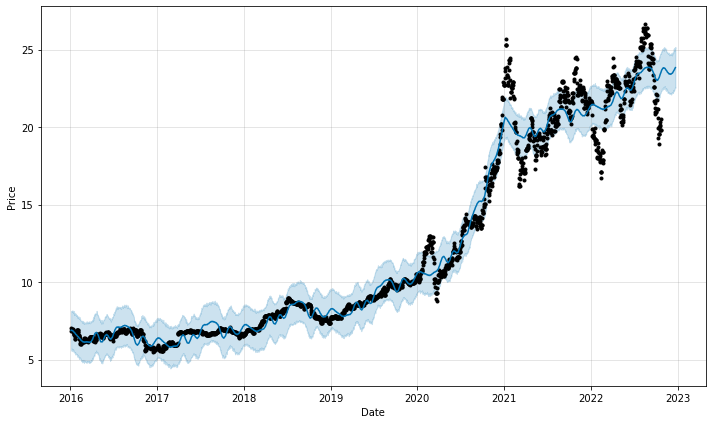

In [222]:
model.plot(preds_train_EDPR, xlabel = 'Date', ylabel = 'Price');

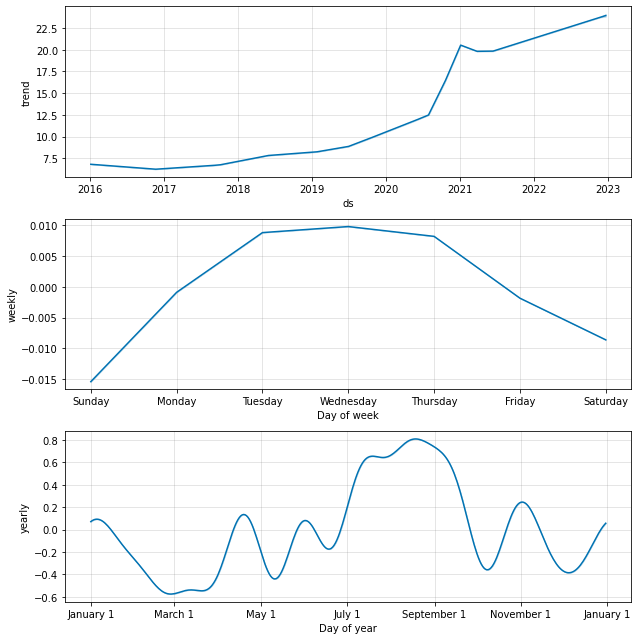

In [223]:
model.plot_components(preds_train_EDPR);#shows the trend over the years, over one year and weekly 

In [224]:
plot_components_plotly(model, preds_train_EDPR)#shows the trend over the years, over one year and weekly 

In [225]:
plot_plotly(model, preds_train_EDPR)

##### Validating the Forecast

In [226]:
# Create a dataframe to store r2 score
PROPHET= pd.DataFrame({'r2_score': r2_score(dataset_EDPR['y'], preds_train_EDPR['yhat'])}, index = [0])

# Add columns in the dataframe 'evaluation_results'
PROPHET['Model'] = 'PROPHET'
PROPHET.set_index(['Model'], inplace=True)
PROPHET['mean_absolute_error'] = mean_absolute_error(dataset_EDPR['y'], preds_train_EDPR['yhat'])
PROPHET['mean_squared_error'] = mean_squared_error(dataset_EDPR['y'], preds_train_EDPR['yhat'])
PROPHET['root_mean_squared_error'] = np.sqrt(mean_squared_error(dataset_EDPR['y'], preds_train_EDPR['yhat']))
PROPHET['mean_absolute_percentage_error'] = np.mean(np.abs(preds_train_EDPR['yhat'] - dataset_EDPR['y'])
                                                               /np.abs(dataset_EDPR['y']))*100
# Display the results
PROPHET

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                        
PROPHET  0.974134             0.682828            1.037559   

         root_mean_squared_error  mean_absolute_percentage_error  
Model                                                             
PROPHET                 1.018606                        5.199815

In [227]:
from prophet.diagnostics import cross_validation
# Apply cross-validation on our model. This creates a forecast, for 132 days ahead (only week days), every 66 days, with 3 years of initial training data.
# As we have 6.5 years of data, this results in 21 forecasts (1 every quarter of a year, starting from 3 years -> 6 years).
crossv_EDPR = cross_validation( model, initial = '768 days', period = '66 days', horizon = '132 days' )

INFO:prophet:Making 25 forecasts with cutoffs between 2018-02-11 00:00:00 and 2022-06-14 00:00:00


  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7loqcdj/n2euzq4m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7loqcdj/k3d3f5kq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85437', 'data', 'file=/tmp/tmpm7loqcdj/n2euzq4m.json', 'init=/tmp/tmpm7loqcdj/k3d3f5kq.json', 'output', 'file=/tmp/tmpm7loqcdj/prophet_modeleypamg_c/prophet_model-20221226182800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:28:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:28:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7loqcdj/pctrin8f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7loqcdj/xxvk9jv2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [228]:
perf_EDPR = performance_metrics(crossv_EDPR )
perf_EDPR.tail()

horizon       mse      rmse       mae      mape     mdape     smape  \
114 128 days  8.093990  2.844994  2.042114  0.127295  0.109487  0.128288   
115 129 days  8.367822  2.892719  2.068688  0.128727  0.110907  0.129616   
116 130 days  8.580249  2.929206  2.089420  0.129760  0.110586  0.130569   
117 131 days  8.731508  2.954912  2.102792  0.130406  0.111147  0.131141   
118 132 days  8.891410  2.981847  2.118360  0.131204  0.111851  0.131905   

     coverage  
114  0.177576  
115  0.183636  
116  0.192727  
117  0.190909  
118  0.190303

In [229]:
# Evaluate the mean MAPE for our forecasts.
crossv_mape_EDPR = round( 100 * perf_EDPR['mape'].mean(), 2 )
print( f'Cross validation MAPE: %' , crossv_mape_EDPR)

Cross validation MAPE: % 10.0


#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [230]:
dataset_VWS = pd.read_csv('VWS.csv')
dataset_VWS.head()

Date        Open        High         Low       Close  Volume  \
0  2016-01-04  462.173593  472.420937  464.095398  464.095398    2528   
1  2016-01-05  468.420471  465.394619  454.298747  463.832916    1738   
2  2016-01-06  464.906577  464.906577  448.815834  457.195557    8847   
3  2016-01-07  446.190319  452.907389  438.033407  449.296509    1021   
4  2016-01-08  446.556346  454.229448  438.885925  447.345032    6636   

   Dividends  Stock Splits    WeekDay  Month  Year  
0        0.0           0.0     Monday      1  2016  
1        0.0           0.0    Tuesday      1  2016  
2        0.0           0.0  Wednesday      1  2016  
3        0.0           0.0   Thursday      1  2016  
4        0.0           0.0     Friday      1  2016

In [231]:
dataset_VWS = dataset_VWS[['Date', 'Close']].rename(columns = {'Date': 'ds', 'Close': 'y'})
dataset_VWS.head()

ds           y
0  2016-01-04  464.095398
1  2016-01-05  463.832916
2  2016-01-06  457.195557
3  2016-01-07  449.296509
4  2016-01-08  447.345032

In [232]:
dataset_VWS.tail()

ds           y
2541  2022-12-19  196.119995
2542  2022-12-20  192.919998
2543  2022-12-21  194.610001
2544  2022-12-22  196.085007
2545  2022-12-23  198.184998

In [233]:
dataset_VWS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2546 non-null   object 
 1   y       2546 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.9+ KB


In [234]:
dataset_VWS.shape

(2546, 2)

In [235]:
#Split into train / test 

train_VWS = dataset_VWS.iloc[:-60 , :]
test_VWS = dataset_VWS.tail(60)

In [236]:
train_VWS.tail()

ds           y
2481  2022-10-20  141.679993
2482  2022-10-21  141.300003
2483  2022-10-22  141.300003
2484  2022-10-23  141.300003
2485  2022-10-24  143.020004

In [237]:
test_VWS.head()

ds           y
2486  2022-10-25  143.580002
2487  2022-10-26  150.509995
2488  2022-10-27  150.919998
2489  2022-10-28  149.240005
2490  2022-10-29  149.240005

In [238]:
test_VWS.tail(3)

ds           y
2543  2022-12-21  194.610001
2544  2022-12-22  196.085007
2545  2022-12-23  198.184998

In [239]:
test_VWS.shape, train_VWS.shape

((60, 2), (2486, 2))

In [240]:
model = Prophet()
model.fit(train_VWS)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7loqcdj/10d006dk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7loqcdj/bhu4fx3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92588', 'data', 'file=/tmp/tmpm7loqcdj/10d006dk.json', 'init=/tmp/tmpm7loqcdj/bhu4fx3p.json', 'output', 'file=/tmp/tmpm7loqcdj/prophet_model97yfdxap/prophet_model-20221226182834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:28:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:28:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [241]:
future_VWS = model.make_future_dataframe(periods=60, freq='d', include_history = True ) # With this line of code the model will make predictions for the next 60 days

In [242]:
preds_train_VWS = model.predict(future_VWS)

In [243]:
preds_train_VWS.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2541 2022-12-19  142.327508   76.664478  196.153633   133.926679   152.353944   
2542 2022-12-20  142.137945   78.951105  198.516233   133.010073   152.611194   
2543 2022-12-21  141.948381   76.351775  193.675045   132.313067   152.726942   
2544 2022-12-22  141.758818   75.288166  199.623277   131.894126   153.060225   
2545 2022-12-23  141.569255   77.046829  195.713707   131.320162   153.117252   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2541       -8.541650             -8.541650             -8.541650 -0.843413   
2542       -6.710366             -6.710366             -6.710366  0.190011   
2543       -5.892840             -5.892840             -5.892840  0.200452   
2544       -5.291168             -5.291168             -5.291168 -0.010503   
2545       -4.416313             -4.416313             -4.416313  0.050381   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
2541     -0.843413     -0.843413 -7.698237     -7.698237     -7.698237   
2542      0.190011      0.190011 -6.900377     -6.900377     -6.900377   
2543      0.200452      0.200452 -6.093293     -6.093293     -6.093293   
2544     -0.010503     -0.010503 -5.280664     -5.280664     -5.280664   
2545      0.050381      0.050381 -4.466694     -4.466694     -4.466694   

      multiplicative_terms  multiplicative_terms_lower  \
2541                   0.0                         0.0   
2542                   0.0                         0.0   
2543                   0.0                         0.0   
2544                   0.0                         0.0   
2545                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
2541                         0.0  133.785858  
2542                         0.0  135.427578  
2543                         0.0  136.055541  
2544                         0.0  136.467650  
2545                         0.0  137.152941

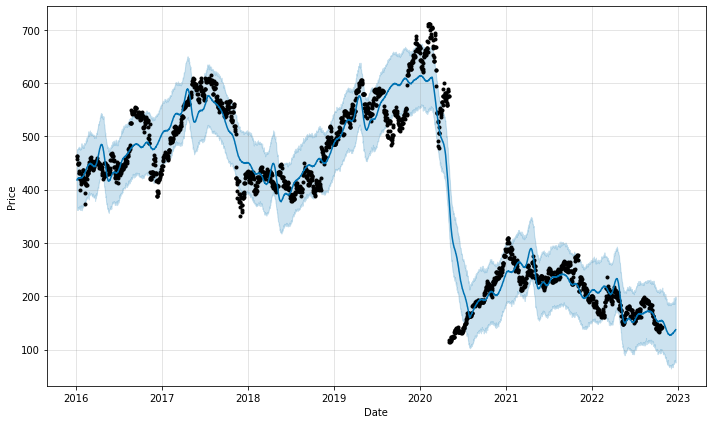

In [244]:
model.plot(preds_train_VWS, xlabel = 'Date', ylabel = 'Price');

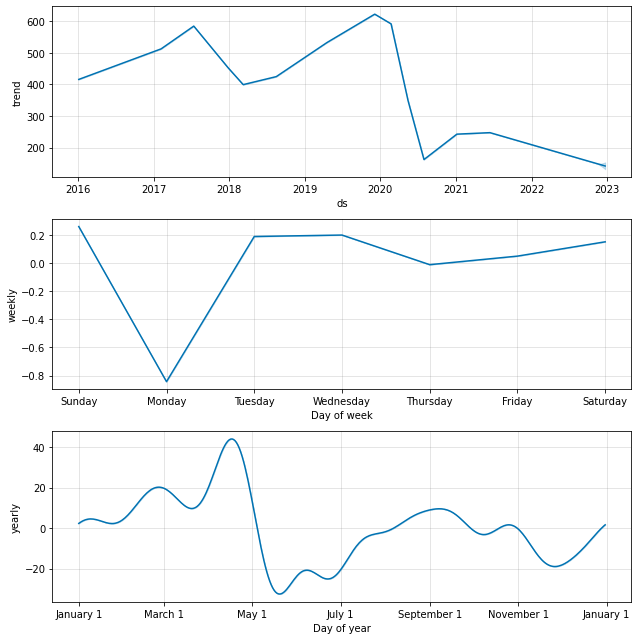

In [245]:
model.plot_components(preds_train_VWS);#shows the trend over the years, over one year and weekly 

In [246]:
plot_components_plotly(model, preds_train_VWS)#shows the trend over the years, over one year and weekly 

In [247]:
plot_plotly(model, preds_train_VWS)

##### Validating the Forecast

In [248]:
# Create a dataframe to store r2 score
PROPHET_VWS= pd.DataFrame({'r2_score': r2_score(dataset_VWS['y'], preds_train_VWS['yhat'])}, index = [0])

# Add columns in the dataframe 'evaluation_results'
PROPHET_VWS['Model'] = 'PROPHET_VWS'
PROPHET_VWS.set_index(['Model'], inplace=True)
PROPHET_VWS['mean_absolute_error'] = mean_absolute_error(dataset_VWS['y'], preds_train_VWS['yhat'])
PROPHET_VWS['mean_squared_error'] = mean_squared_error(dataset_VWS['y'], preds_train_VWS['yhat'])
PROPHET_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(dataset_VWS['y'], preds_train_VWS['yhat']))
PROPHET_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(preds_train_VWS['yhat'] - dataset_VWS['y'])
                                                               /np.abs(dataset_VWS['y']))*100
# Display the results
PROPHET_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                            
PROPHET_VWS  0.922593             32.18822         1989.907777   

             root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                 
PROPHET_VWS                44.608382                       10.532391

#### CROSSVALIDATION

In [249]:
from prophet.diagnostics import cross_validation
# Apply cross-validation on our model. This creates a forecast, for 132 days ahead (only week days), every 66 days, with 3 years of initial training data.
# As we have 6.5 years of data, this results in 21 forecasts (1 every quarter of a year, starting from 3 years -> 6 years).
crossv_VWS = cross_validation( model, initial = '768 days', period = '66 days', horizon = '132 days' )

INFO:prophet:Making 25 forecasts with cutoffs between 2018-02-11 00:00:00 and 2022-06-14 00:00:00


  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7loqcdj/9698_17y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7loqcdj/nhlylyos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81832', 'data', 'file=/tmp/tmpm7loqcdj/9698_17y.json', 'init=/tmp/tmpm7loqcdj/nhlylyos.json', 'output', 'file=/tmp/tmpm7loqcdj/prophet_model138mt49k/prophet_model-20221226182838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:28:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:28:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7loqcdj/vd9uxe32.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7loqcdj/qv87898b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [250]:
perf_VWS = performance_metrics(crossv_VWS )
perf_VWS.tail()

horizon           mse        rmse         mae      mape     mdape  \
114 128 days  46276.714618  215.120233  163.527774  0.670597  0.361038   
115 129 days  46344.874381  215.278597  163.926322  0.673142  0.363340   
116 130 days  46509.200700  215.659919  164.539851  0.675929  0.364244   
117 131 days  46728.385577  216.167494  165.247306  0.679009  0.369015   
118 132 days  47011.699319  216.821815  166.167835  0.682786  0.377295   

        smape  coverage  
114  0.614583  0.304848  
115  0.615605  0.301818  
116  0.617060  0.295758  
117  0.618745  0.289697  
118  0.620844  0.283636

In [251]:
# Evaluate the mean MAPE for our forecasts.
crossv_mape_VWS = round( 100 * perf_VWS['mape'].mean(), 2 )
print( f'Cross validation MAPE: %' , crossv_mape_VWS)

Cross validation MAPE: % 52.95


## Summary

In [252]:
Validation_EDPR= pd.concat([MA_SES_EDPR, MA_HoltWinters_EDPR,R_arma_EDPR,R_SARIMAX_EDPR,NEURAL_NET,PROPHET])
Validation_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_SES           0.958277             0.270830            0.172290   
MA_Holt-Winters  0.959024             0.273437            0.169204   
ARMA             0.958282             0.271694            0.172268   
SARIMAX          0.947474             0.355280            0.216899   
NEURAL_NET      -3.681678             1.024905            1.201849   
PROPHET          0.974134             0.682828            1.037559   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_SES                          0.415078                        1.243024  
MA_Holt-Winters                 0.411344                        1.254778  
ARMA                            0.415051                        1.246834  
SARIMAX                         0.465724                        1.625413  
NEURAL_NET                      1.096289                        4.652181  
PROPHET                         1.018606                        5.199815

In [253]:
Validation_VWS= pd.concat([MA_SES_VWS, MA_HoltWinters_VWS,R_arma_VWS,R_SARIMAX_VWS, PROPHET_VWS])
Validation_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_SES           0.920314             3.957131           31.271809   
MA_Holt-Winters  0.920314             3.957131           31.271809   
ARMA            -0.628264            21.090838          638.993751   
SARIMAX         -0.257028            18.225973          493.306367   
PROPHET_VWS      0.922593            32.188220         1989.907777   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_SES                          5.592120                        2.203026  
MA_Holt-Winters                 5.592120                        2.203026  
ARMA                           25.278326                       12.098101  
SARIMAX                        22.210501                        3.482154  
PROPHET_VWS                    44.608382                       10.532391

## Complementary Reading

Reference: Efstathopoulos g. (2020) Python for Finance, Part I: Yahoo & Google Finance API, pandas, and matplotlib 
Available at: URL <a href="https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ ">https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ </a>(Accessed 14 October 2021).  

Reference: Witham, J. (2020) The Imperative For A 24/7 Renewable Energy World, Forbes. 
Available at: URL <a href="https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo">https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo/ </a>(Accessed 14 October 2021).  

Reference: Norris, E. (2021) "Why Did My Stock's Ticker Change?", Investopedia. 
Available at: URL <a href="https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/">https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/ </a>(Accessed 14 October 2021).  

Reference: Mahgoub, A. (2021) "Stock Prediction using Regression Algorithm in Python", Medium. 
Available at: URL <a href="https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9/">https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9</a>(Accessed 25 Feb 2022). 

Reference: Prabhakaran, S. (2019) "Augmented Dickey Fuller Test (ADF Test) – Must Read Guide", Medium. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.">https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.</a>

Reference: Masum, M. (2020) "Time Series Analysis: Identifying AR and MA using ACF and PACF Plots", Medium. 
Available at: URL <a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8</a> (Accessed 21 March 2022).  

Reference: Zvornicanin E. (2021) "Choosing the best q and p from ACF and PACF plots in ARMA-type modeling", Baeldung. 
Available at: URL <a href="https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling">https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling</a> (Accessed 21 March 2022). 


Reference: Prabhakaran S. (2021) "ARIMA Model – Complete Guide to Time Series Forecasting in Python", Machinelearningplus. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/">https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/</a> (Accessed 21 March 2022). 

Reference: Daitan (2019) "A Visual Guide to Time Series Decomposition Analysis", Betterprogramming 
Available at: URL <a href="https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930">https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930</a> (Accessed 14 April 2022).

Reference: Zach (2021) "Augmented Dickey-Fuller Test in Python (With Example)", Statology.org 
Available at: URL <a href="https://www.statology.org/dickey-fuller-test-python/">https://www.statology.org/dickey-fuller-test-python/</a> (Accessed 14 April 2022).

Reference: Shao, V.(2020) "Forecasting with a Time Series Model using Python: Part One", Bounteous
Available at: URL <a href="https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/">https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/</a> (Accessed 15 April 2022).
